# **Actividad 3. Problema: Rotación de cargo**

# **Estudiante:** Javier Armando Rodríguez Prada, Código: 8980080


En una organización, se busca comprender y prever los factores que influyen en la rotación de empleados entre distintos cargos. La empresa ha recopilado datos históricos sobre el empleo de sus trabajadores, incluyendo variables como la antigüedad en el cargo actual, el nivel de satisfacción laboral, el salario actual, edad y otros factores relevantes. La gerencia planea desarrollar un modelo de regresión logística que permita estimar la probabilidad de que un empleado cambie de cargo en el próximo período y determinar cuales factores indicen en mayor proporción a estos cambios.

Con esta información, la empresa podrá tomar medidas proactivas para retener a su talento clave, identificar áreas de mejora en la gestión de recursos humanos y fomentar un ambiente laboral más estable y tranquilo. La predicción de la probabilidad de rotación de empleados ayudará a la empresa a tomar decisiones estratégicas informadas y a mantener un equipo de trabajo comprometido y satisfecho en sus roles actuales.

A continuación se describen los pasos que la gerencia ha propuesto para el análisis:

# **Cargamos la base de datos "rotacion"**

**Cargamos la base de datos en R  con el código del docnete**

install.packages("devtools")

devtools::install_github("dgonxalex80/paqueteMODELOS", force =TRUE)

library(paqueteMODELOS)

data("rotacion")

**Exportamos la base de datso de R a excel** (nombre: base_RLog)

library (openxlsx)

datos <- rotacion

datos

write.xlsx(datos, "base_RLog.xlsx")



In [ ]:
# Cargamos la base de datos

import pandas as pd
df =  pd.read_excel("/content/base_RLog.xlsx")

In [ ]:
# Exploramos la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Rotación                     1470 non-null   object
 1   Edad                         1470 non-null   int64 
 2   Viaje de Negocios            1470 non-null   object
 3   Departamento                 1470 non-null   object
 4   Distancia_Casa               1470 non-null   int64 
 5   Educación                    1470 non-null   int64 
 6   Campo_Educación              1470 non-null   object
 7   Satisfacción_Ambiental       1470 non-null   int64 
 8   Genero                       1470 non-null   object
 9   Cargo                        1470 non-null   object
 10  Satisfación_Laboral          1470 non-null   int64 
 11  Estado_Civil                 1470 non-null   object
 12  Ingreso_Mensual              1470 non-null   int64 
 13  Trabajos_Anteriores          1470

# **1. Selección de variables**
Seleccione 3 variables categóricas (distintas de rotación) y 3 variables cuantitativas, que se consideren estén relacionadas con la rotación.

Nota:
Debes justificar porque estas variables están relacionadas y que tipo de relación se espera entre ellas (Hipótesis).

# **Variables categóricas:**

1. Género:Las mujeres pueden tener menor rotación en el cargo porque,  por ejemplo, aquellas que son madres cabeza de hogar desean más estabilidad para mantener el sustento y cuidado de sus hijos-.

2. Estado civil: Los trabajadores (as) que están casados (as) pueden rotar menos en el cargo toda vez que desean más estabilidiad para no poner el riesgo  el sustento y cuidado de su familia.

3. Viaje de negocios: Dependiendo de la frecuencia y la duración, los viajes de negocios pueden ser estresantes y agotadores, situación que puede motivar la rotación en el cargo.

Las 3 variables estarian relacionadas entre si. Por ejemplo, al tomar como referencia la variable "viajes de negocios" podria sospecharse que a mayor número de viajes se comprometeria el tiempo para esposo(a) y/o hijos en aquellos que estan casados. Esta situación seria más critica en las mujeres cabeza de familia.   

# **Variables continuas:**

1. Edad: Los empleados más jóvenes pueden ser más propensos a cambiar de trabajo, mientras que los empleados mayores pueden tener más probabilidades de permanecer en su puesto.

2. Trabajos anteriores: Si los empleados sienten que su trabajo interfiere con su vida personal (familia, por ejemplo) o que no tienen suficiente tiempo para dedicarse a sus intereses personales, pueden ser más propensos a dejar su trabajo.

3. Capacitaciones: los empleados con más capacitaciones pueden ser aquellos que están rotando más en los cargos toda vez que deben recibir inducción y entrenamiento al cambiar a uno nuevo.

Las 3 variables estarian relacionadas entre si. Por ejemplo, al tomar como referencia la "edad"  podria sospecharse que los trabajadores más jovenes tendrian menos probabilidad de mantenerse en el mismo cargo, lo que implica más trabajos en el pasado y más capacitaciones para la inducción y entrenamiento en uno nuevo.

# **2. Análisis univariado**
Realiza un análisis univariado (caracterización) de la información contenida en la base de datos rotacion.

Nota:
Los indicadores o gráficos se usan dependiendo del tipo de variable (cuantitativas o cualitativas). Incluir interpretaciones de la variable rotacion.

 **Comentario general**: Se revisa una base de datos datos históricos (con 1470 registros) sobre el empleo de sus trabajadores la cual incluye multiples variables dentro de las cuales sobresale la "Rotación" como variable dependiente, de caracter binario (Si/NO) y de interes para el ejercicio. Como  variables categoricas se identifican: Viaje de Negocios, Departamento, Campo_Educación, Genero, Cargo, Estado_Civil y Horas_Extra.

 Dentro de las variables  numéricas se encuentran: Edad,  Distancia_Casa, Educación, Satisfacción-Ambiental, Ingreso-Mensual,Trabajos_Anteriroes, Porcentaje_aumento_salarial, Rendimiento_Laboral, Años_Experiencia, Capacitaciones, Equilibrio_Trabajo_Vida, Antigüedad, Antigüedad_Cargo, Años_ultima_promoción y Años_acargo_con_mismo_jefe.

# **Variables cuantitativas**

In [ ]:
# Resumen estadístico de las variables cuantitativas

resumen_estadistico = df.describe()
print(resumen_estadistico)

              Edad  Distancia_Casa    Educación  Satisfacción_Ambiental  \
count  1470.000000     1470.000000  1470.000000             1470.000000   
mean     36.924490        9.192517     2.912925                2.721769   
std       9.135938        8.106864     1.024165                1.093082   
min      18.000000        1.000000     1.000000                1.000000   
25%      30.000000        2.000000     2.000000                2.000000   
50%      36.000000        7.000000     3.000000                3.000000   
75%      43.000000       14.000000     4.000000                4.000000   
max      60.000000       29.000000     5.000000                4.000000   

       Satisfación_Laboral  Ingreso_Mensual  Trabajos_Anteriores  \
count          1470.000000      1470.000000          1470.000000   
mean              2.728571      6502.931293             2.693197   
std               1.102846      4707.956783             2.498009   
min               1.000000      1009.000000         

## Diagramas de caja y bigotes

In [ ]:
#Importamos las bibliotecas necesarias

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas de tipo "int", excluyendo 'Ingreso_mensual' para no afectar la escala del gráfico
columnas_cuantitativas = df.select_dtypes(include=['int']).columns.difference(['Ingreso_Mensual'])


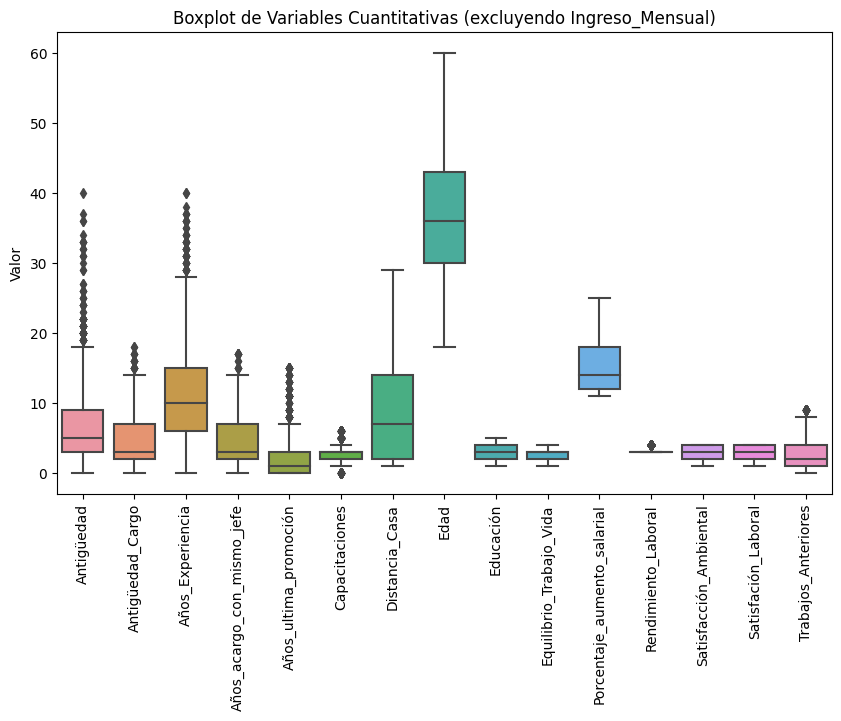

In [ ]:
# Creamos el boxplot y personalizamos las etiquetas
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df[columnas_cuantitativas])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x
plt.title('Boxplot de Variables Cuantitativas (excluyendo Ingreso_Mensual)')
plt.ylabel('Valor')
plt.show()

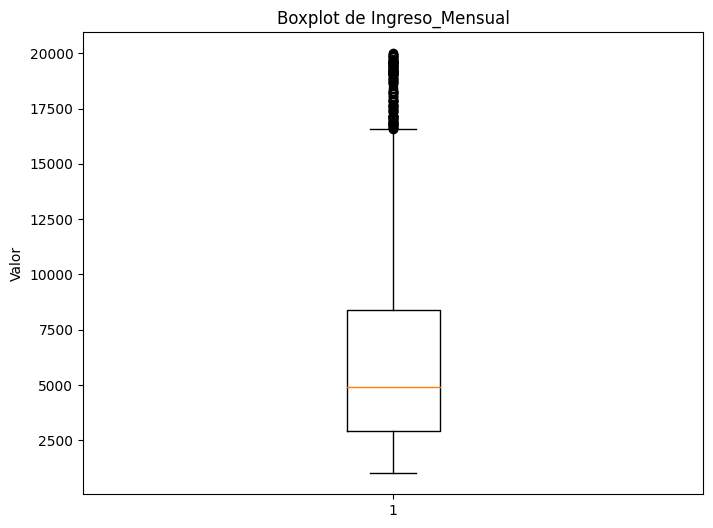

In [ ]:
# Boxplot para 'Ingreso_Mensual'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Ingreso_Mensual'])
plt.title('Boxplot de Ingreso_Mensual')
plt.ylabel('Valor')
plt.show()

# Diagramas de barras

In [ ]:
# Seleccionar solo las columnas con variables cuantitativas (numéricas)
cuantitativas = df.select_dtypes(include=['int']).columns.difference(['Ingreso_Mensual'])


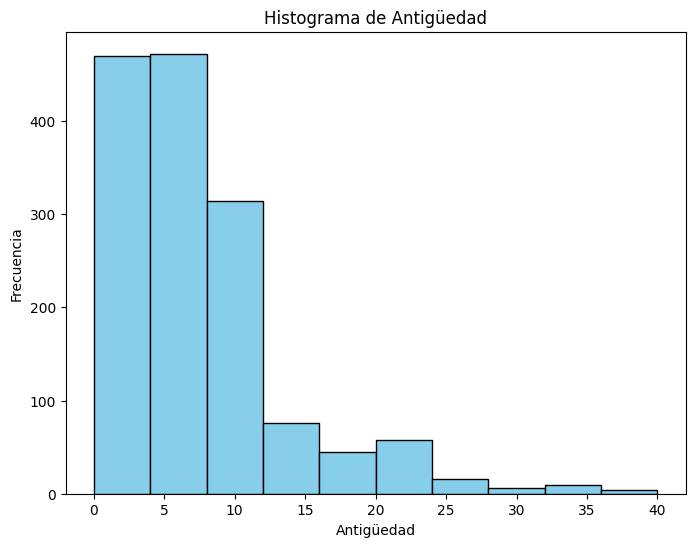

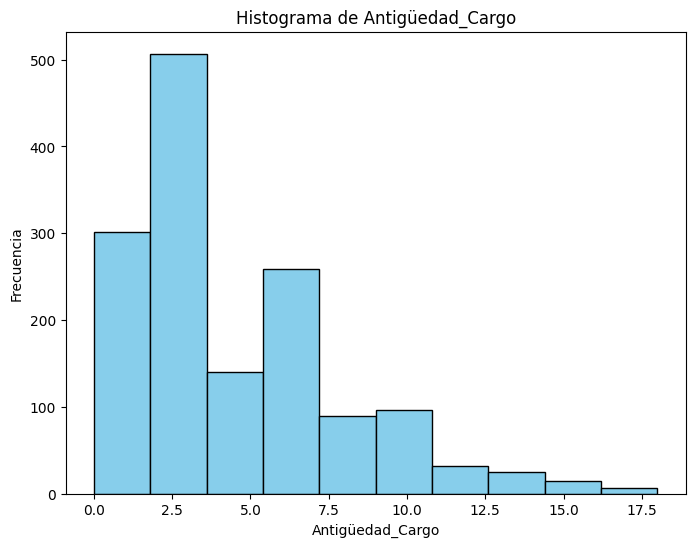

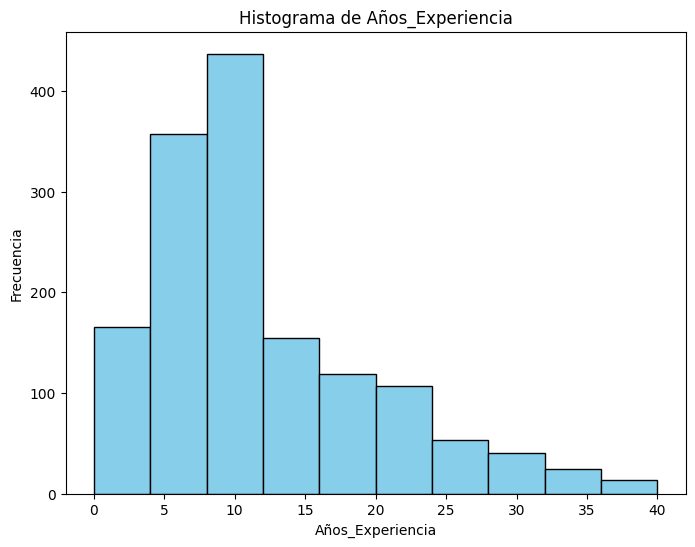

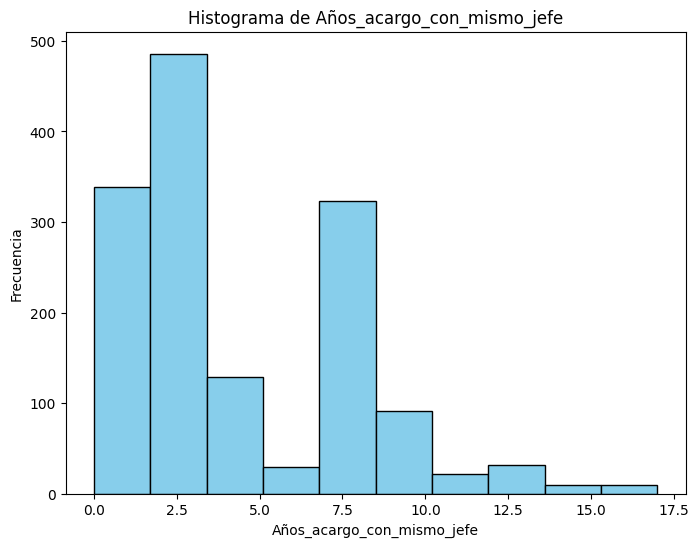

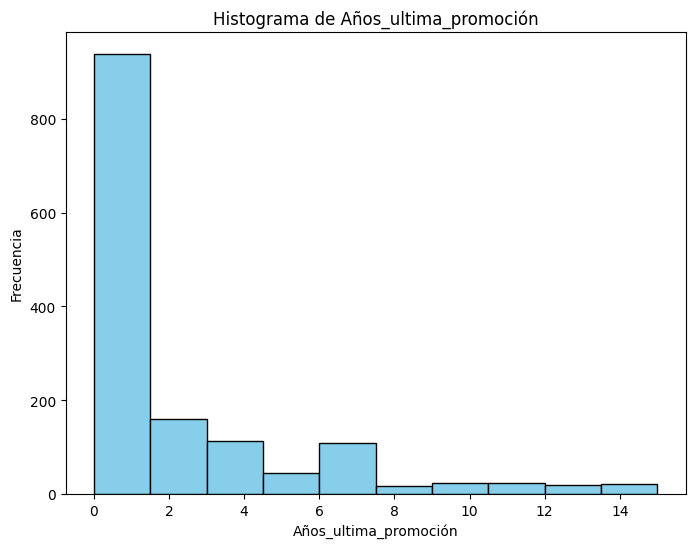

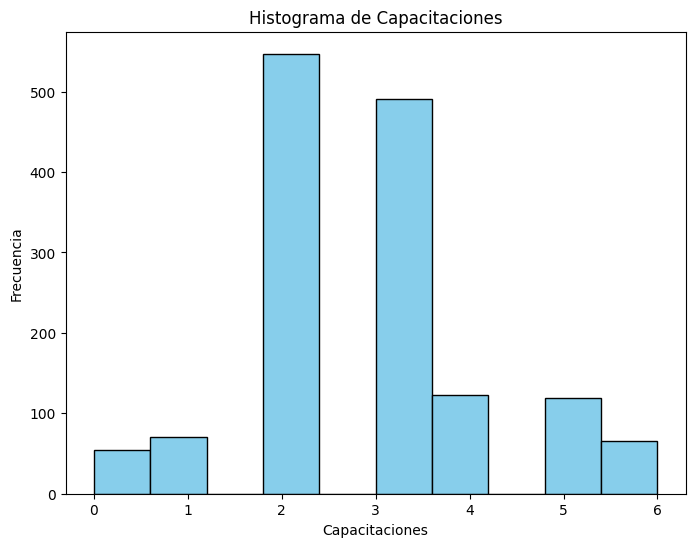

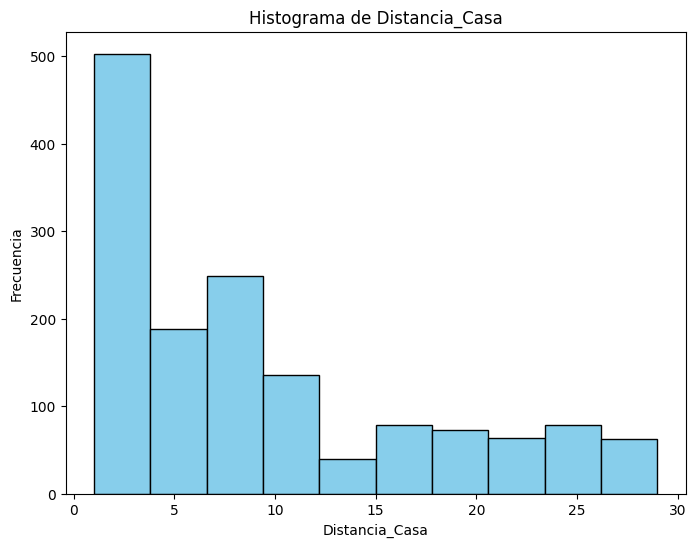

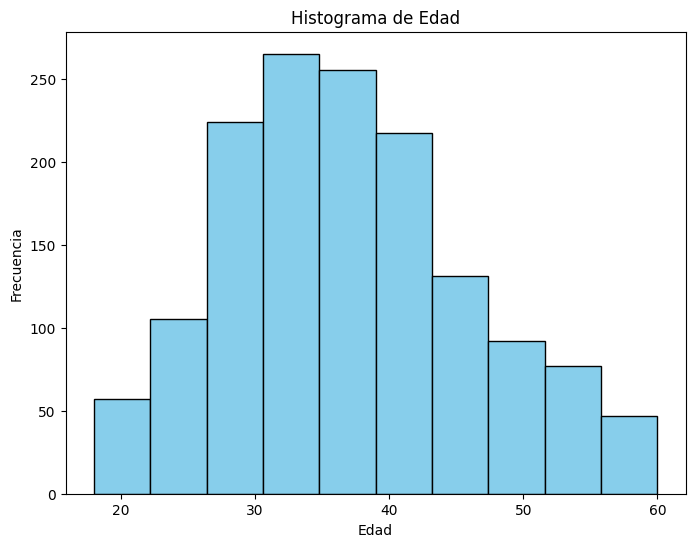

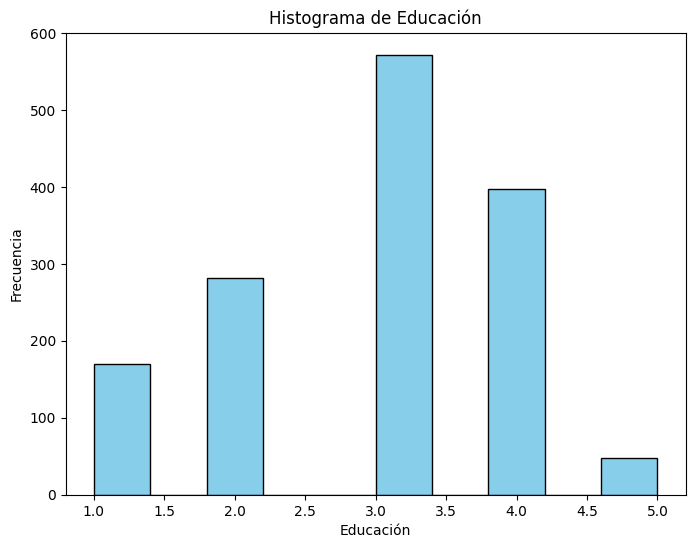

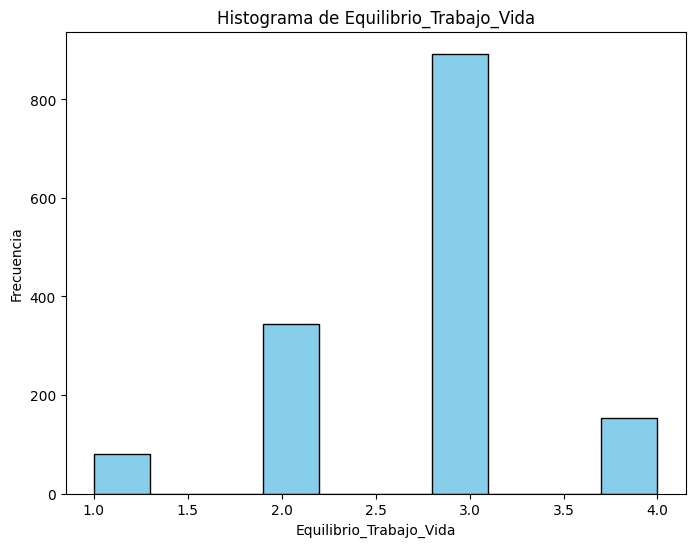

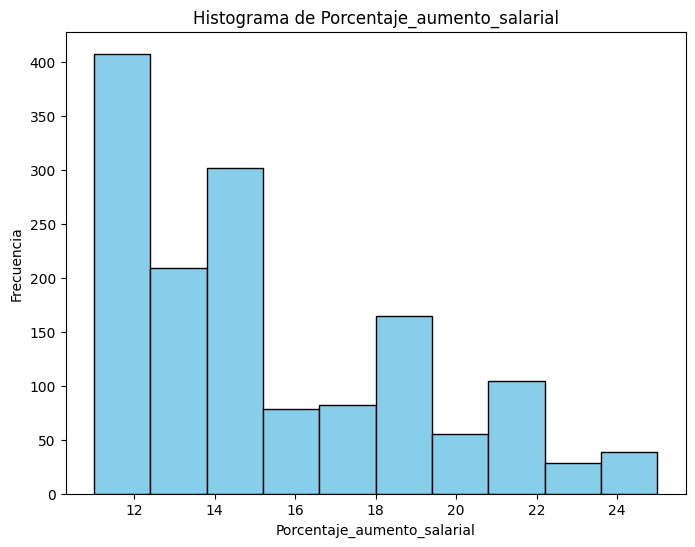

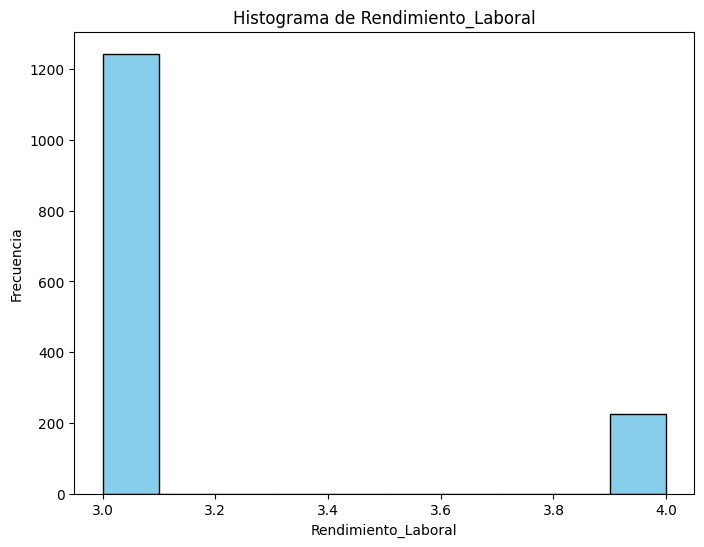

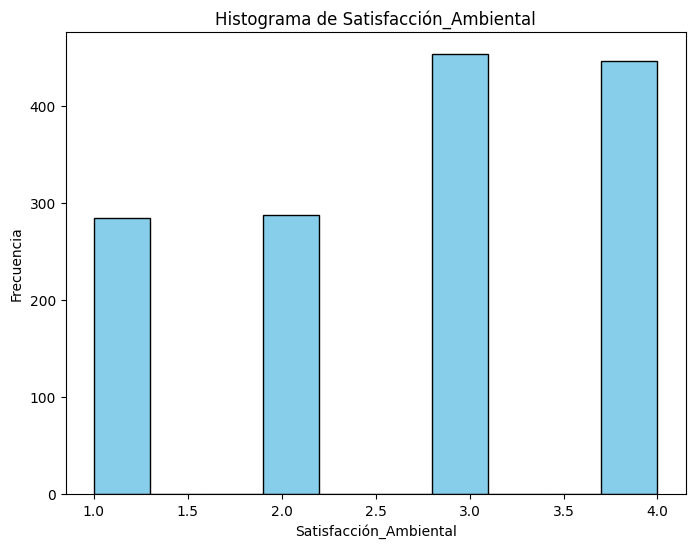

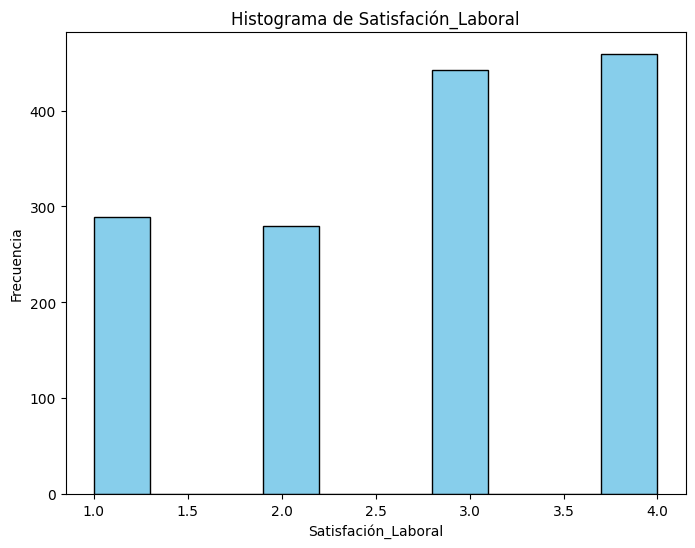

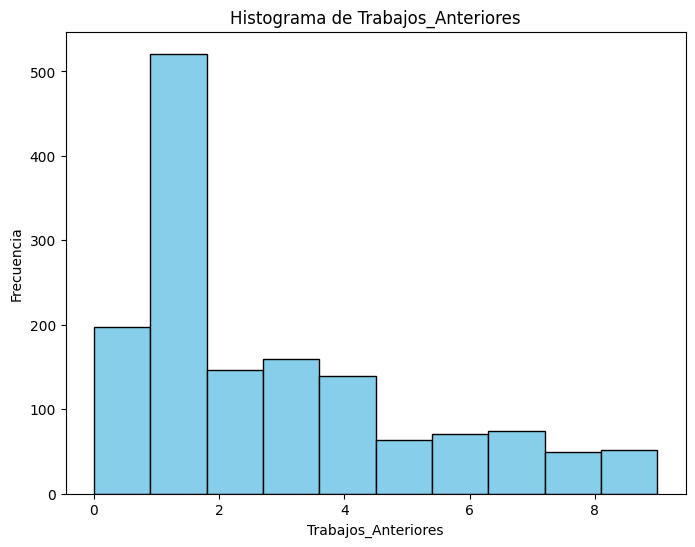

In [ ]:
# Crear los histogramas para las variables cuantitativas
for variable in cuantitativas:
    plt.figure(figsize=(8, 6))
    plt.hist(df[variable], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
# Histograma para la variable "Ingreso_Mensual"

# Seleccionamos la columna 'Edad' (reemplaza 'Edad' con el nombre de tu columna)
datos = df['Ingreso_Mensual']


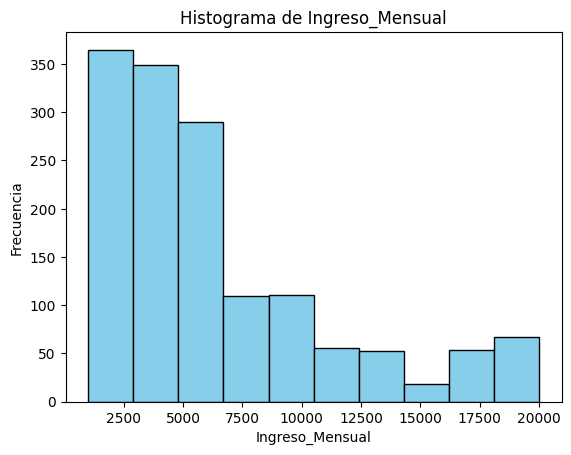

In [ ]:
# Crear el histograma
plt.hist(datos, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Ingreso_Mensual')
plt.xlabel('Ingreso_Mensual')
plt.ylabel('Frecuencia')
plt.show()

## **Variables cualitativas**

In [ ]:
import numpy as np

In [ ]:
# Seleccionamos solo las columnas con variables cualitativas (objetos)
cualitativas = df.select_dtypes(include=['object'])

In [ ]:
# Calcular la moda de cada columna
moda = cualitativas.mode().iloc[0]


In [ ]:
# Calcular otros estadísticos descriptivos para las variables cualitativas
resumen_estadistico = cualitativas.describe()


In [ ]:
# Imprimir el resultado
print("Moda:")
print(moda)
print("\nResumen estadístico:")
print(resumen_estadistico)

Moda:
Rotación                           No
Viaje de Negocios           Raramente
Departamento                      IyD
Campo_Educación              Ciencias
Genero                              M
Cargo                Ejecutivo_Ventas
Estado_Civil                   Casado
Horas_Extra                        No
Name: 0, dtype: object

Resumen estadístico:
       Rotación Viaje de Negocios Departamento Campo_Educación Genero  \
count      1470              1470         1470            1470   1470   
unique        2                 3            3               6      2   
top          No         Raramente          IyD        Ciencias      M   
freq       1233              1043          961             606    882   

                   Cargo Estado_Civil Horas_Extra  
count               1470         1470        1470  
unique                 9            3           2  
top     Ejecutivo_Ventas       Casado          No  
freq                 326          673        1054  


In [ ]:
# Seleccionar solo las columnas con variables cualitativas (objetos)
cualitativas = df.select_dtypes(include=['object'])

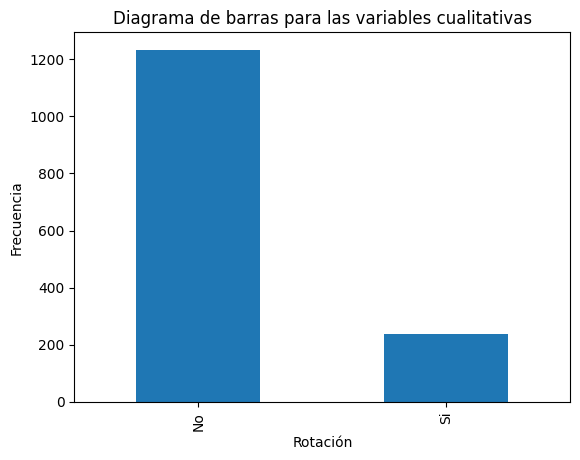

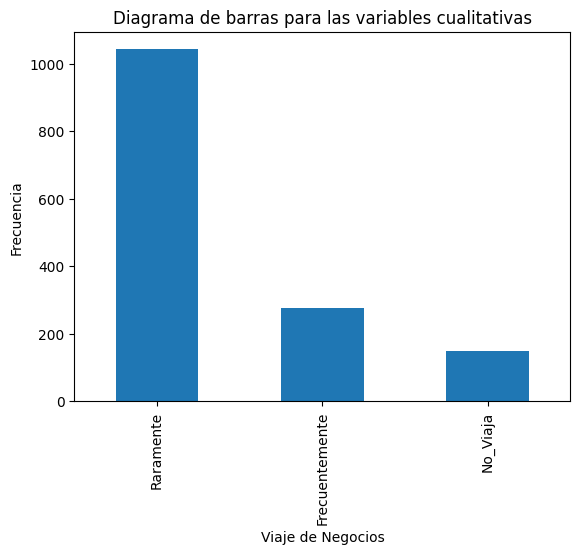

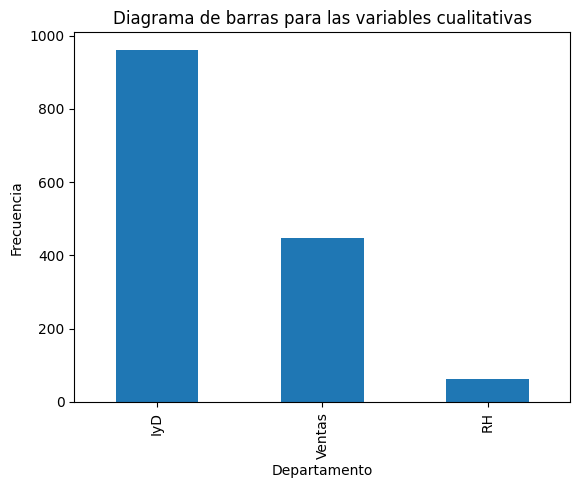

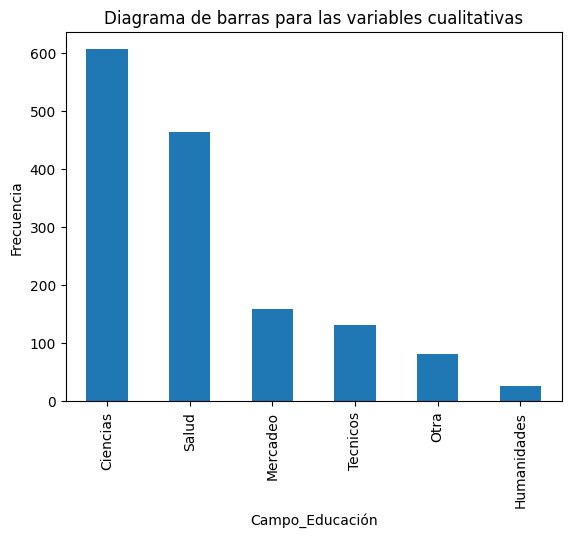

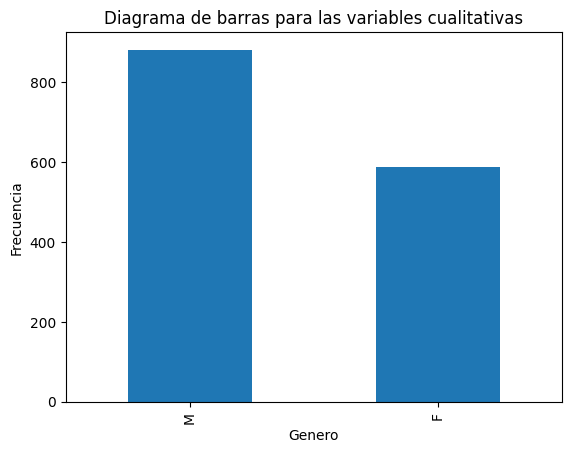

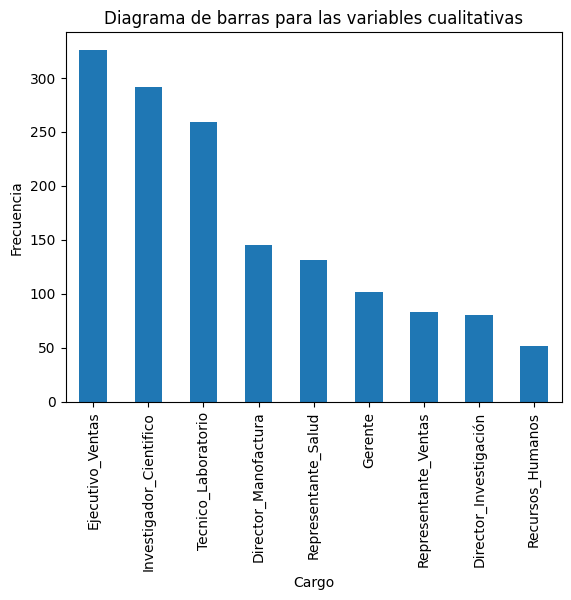

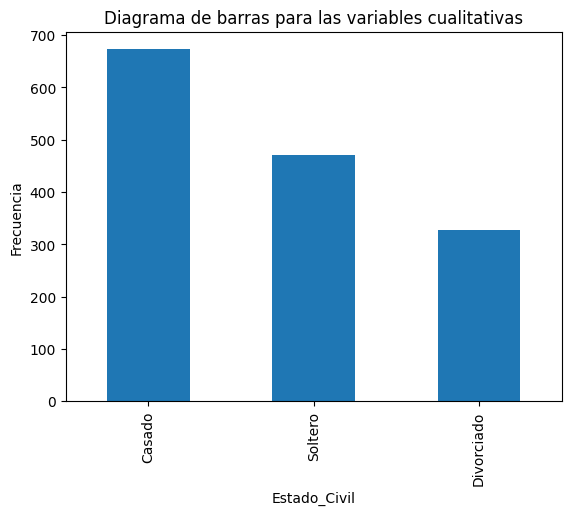

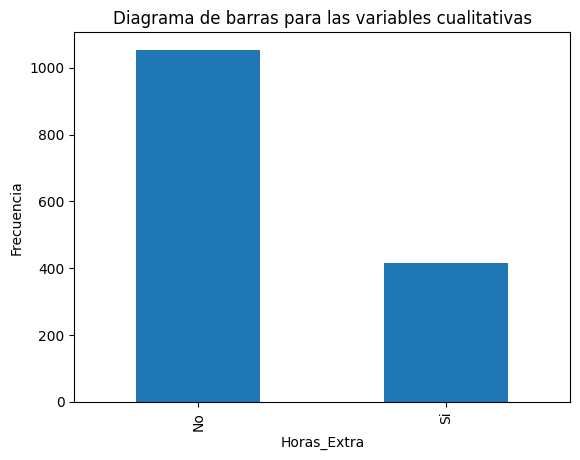

In [ ]:
# Crear el diagrama de barras para cada columna
for col in cualitativas.columns:
    plt.figure()
    cualitativas[col].value_counts().plot(kind='bar')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar etiquetas del eje x
    plt.title('Diagrama de barras para las variables cualitativas'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# **Comentario final Análisis Univariado:**


La base de datos incluye empleados jóvenes (promedio de edad de 36 años,
DE:9.13 años), en su mayoria de sexo masculino (60%), con estado civil casado en casi la mitad (43%) y pertenecientes al departamento de innovación y desarrollo (65.4%). La mediana de ingreso mensual fue de 4919, con baja generación de horas extra (28.3% de los trabajadores) y aumento salarial del 14%. Las medianas de años de educación y número de capacitaciones fueron similares (3 años y 3 capacitaciones). Las medianas de años de "antiguedad", "promoción" y "a cargo del mismo jefe" fueron de 5, 1 y 3 años respectivamente. Las calificaciones de  satisfacción ambiental y laboral y el equilibrio trabajo/vida contaron con las mismas medianas (3 puntos). El rendimiento laboral preponderante fue 3 (84.3%). Finalmente, la mayoria de los trabajadores viajan raramente (71%).La proporción de empleados que rotan en el cargo es del 16.1%  


# **3. Análisis bivariado**

Realiza un análisis de bivariado en donde la variable respuesta sea rotacion codificada de la siguiente manera (y=1
 es si rotación, y=0
 es no rotación). Con base en estos resultados identifique cuales son las variables determinantes de la rotación e interpretar el signo del coeficiente estimado. Compare estos resultados con la hipotesis planteada en el punto 2.

In [ ]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_excel("/content/base_RLog.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Rotación                     1470 non-null   object
 1   Edad                         1470 non-null   int64 
 2   Viaje de Negocios            1470 non-null   object
 3   Departamento                 1470 non-null   object
 4   Distancia_Casa               1470 non-null   int64 
 5   Educación                    1470 non-null   int64 
 6   Campo_Educación              1470 non-null   object
 7   Satisfacción_Ambiental       1470 non-null   int64 
 8   Genero                       1470 non-null   object
 9   Cargo                        1470 non-null   object
 10  Satisfación_Laboral          1470 non-null   int64 
 11  Estado_Civil                 1470 non-null   object
 12  Ingreso_Mensual              1470 non-null   int64 
 13  Trabajos_Anteriores          1470

# **Con variables cuantitativas**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, r2_score
import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, log_loss
from scipy.stats import chi2_contingency





In [ ]:
# Variables que deseas analizar
variables = ['Rotación', 'Edad', 'Antigüedad', 'Antigüedad_Cargo',
             'Años_Experiencia', 'Años_acargo_con_un_mismo_jefe',
             'Años_ultima_promocion', 'Capacitaciones', 'Distancia_Casa',
             'Educacion', 'Equilibrio_Trabajo_Vida',
             'Porcentaje_Aumento_Salarial', 'Rendimiento_Laboral',
             'Satisfacción_Ambiental', 'Satisfacción_Laboral',
             'Trabajos_Anteriores']



# Edad (statsmodels)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Cargar los datos desde la base de datos
data = pd.read_excel('/content/base_RLog.xlsx')

In [ ]:
# Convertimos 'Rotacion' a valores numéricos: 'Si' a 1 y 'No' a 0
data['Rotación'] = data['Rotación'].replace({'Si': 1, 'No': 0})

In [ ]:
# Mostrando el nuevo DataFrame
print(data)

      Rotación  Edad Viaje de Negocios Departamento  Distancia_Casa  \
0            1    41         Raramente       Ventas               1   
1            0    49    Frecuentemente          IyD               8   
2            1    37         Raramente          IyD               2   
3            0    33    Frecuentemente          IyD               3   
4            0    27         Raramente          IyD               2   
...        ...   ...               ...          ...             ...   
1465         0    36    Frecuentemente          IyD              23   
1466         0    39         Raramente          IyD               6   
1467         0    27         Raramente          IyD               4   
1468         0    49    Frecuentemente       Ventas               2   
1469         0    34         Raramente          IyD               8   

      Educación Campo_Educación  Satisfacción_Ambiental Genero  \
0             2        Ciencias                       2      F   
1             1

In [ ]:
# Asegúrate de que 'Edad' es numérica
data['Edad'] = pd.to_numeric(data['Edad'], errors='coerce')

In [ ]:
# Añade una columna de 1s para el intercepto
data['Intercepto'] = 1


In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Edad']]  # Variables independientes
y = data['Rotación']  # Variable dependient

In [ ]:
# Ajusta el modelo de regresión logística
logit_model = sm.Logit(y, X)
resultado = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.428253
         Iterations 6


In [ ]:
# Muestra un resumen del modelo
print(resultado.summary())

                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.03043
Time:                        23:09:59   Log-Likelihood:                -629.53
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.249e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercepto     0.2064      0.306      0.674      0.500      -0.393       0.806
Edad          -0.0523      0.009     -6.006      0.000      -0.069      -0.035


In [ ]:
# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

LLR chi2:  39.51902111843765
P-valor de LLR chi2:  3.2487950360283677e-10


In [ ]:
# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")


R^2 de McFadden: 0.030


In [ ]:
# Coeficientes
print("\nCoeficientes:")
print(resultado.params)



Coeficientes:
Intercepto    0.206369
Edad         -0.052254
dtype: float64


In [ ]:
# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))


Odds Ratio:
Intercepto    1.229207
Edad          0.949087
dtype: float64


In [ ]:
# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())


Intervalo de Confianza:
                   0         1
Intercepto -0.393354  0.806092
Edad       -0.069307 -0.035202


In [ ]:
# Predicciones
predicciones = resultado.predict(X)

In [ ]:
# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")



Precisión: 0.84


In [ ]:
# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")


AUC: 0.63


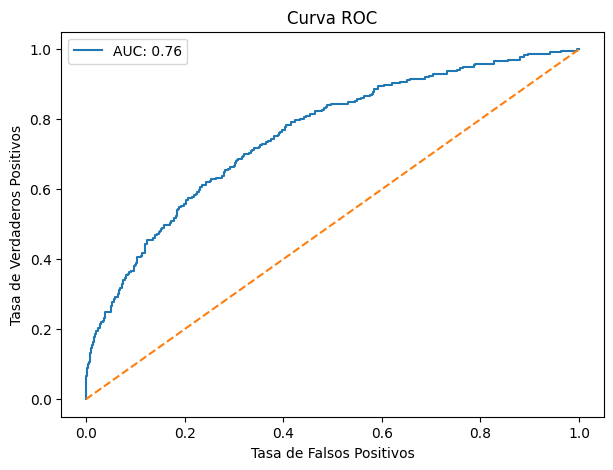

In [294]:
# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



# Antiguedad

Optimization terminated successfully.
         Current function value: 0.430782
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.02471
Time:                        23:09:59   Log-Likelihood:                -633.25
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.477e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercepto    -1.1558      0.111    -10.378      0.000      -1.374      -0.937
Antigüedad    -0.0808      0.

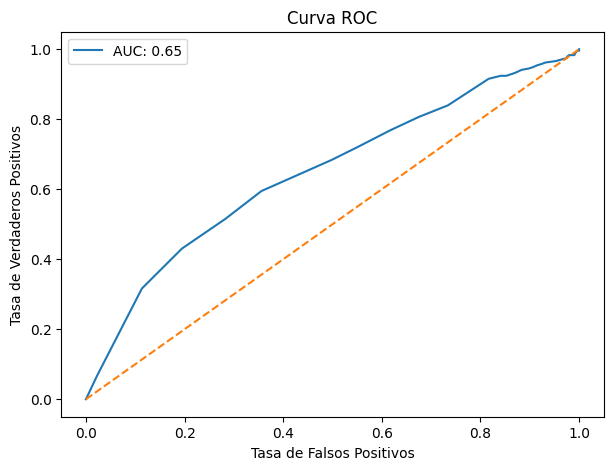

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Antigüedad']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_antiguedad = sm.Logit(y, X)
resultado = logit_model_antiguedad.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



# Antiguedad_Cargo

Optimization terminated successfully.
         Current function value: 0.427171
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.03288
Time:                        23:10:00   Log-Likelihood:                -627.94
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.382e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercepto          -1.1184      0.104    -10.775      0.000      -1.322      -0.915
Antigüedad_

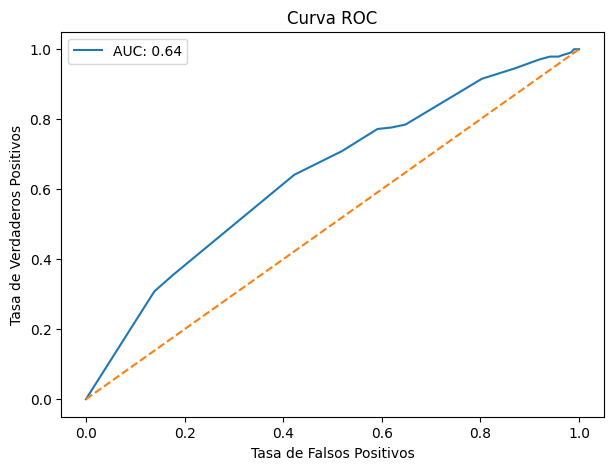

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Antigüedad_Cargo']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_antiguedad_cargo = sm.Logit(y, X)
resultado = logit_model_antiguedad_cargo.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Años_Experiencia

Optimization terminated successfully.
         Current function value: 0.424516
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.03889
Time:                        23:10:00   Log-Likelihood:                -624.04
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.187e-12
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercepto          -0.8831      0.127     -6.929      0.000      -1.133      -0.633
Años_Experi

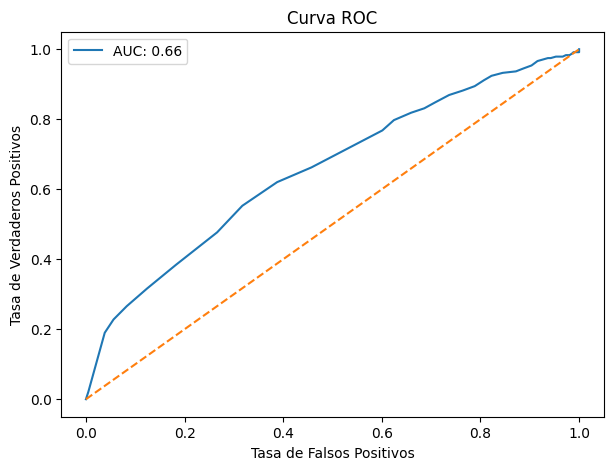

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Años_Experiencia']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_años_experiencia = sm.Logit(y, X)
resultado = logit_model_años_experiencia.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Años_acargo_con_mismo_jefe

Optimization terminated successfully.
         Current function value: 0.428135
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.03070
Time:                        23:10:00   Log-Likelihood:                -629.36
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.719e-10
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercepto                    -1.1468      0.102    -11.195      0.000      

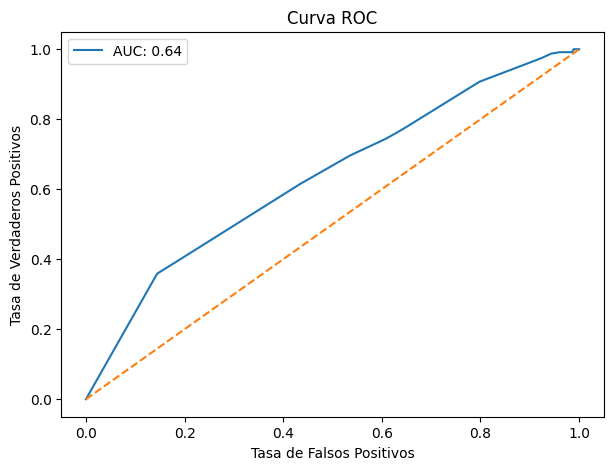

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Años_acargo_con_mismo_jefe']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_años_acargo_mismo_jefe = sm.Logit(y, X)
resultado = logit_model_años_acargo_mismo_jefe.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Años_ultima_promoción

Optimization terminated successfully.
         Current function value: 0.441126
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.001289
Time:                        23:10:01   Log-Likelihood:                -648.45
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.1958
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercepto               -1.5870      0.085    -18.670      0.000      -1.754      -1.

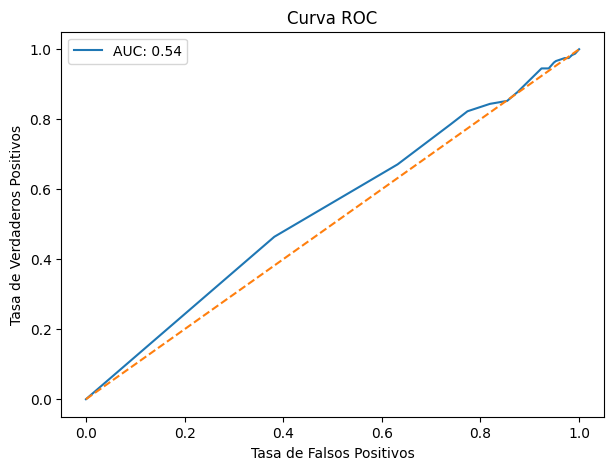

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Años_ultima_promoción']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_años_ultima_promocion = sm.Logit(y, X)
resultado = logit_model_años_ultima_promocion.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Capacitaciones

Optimization terminated successfully.
         Current function value: 0.439886
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.004096
Time:                        23:10:01   Log-Likelihood:                -646.63
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.02110
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercepto        -1.2948      0.167     -7.731      0.000      -1.623      -0.966
Capacitaciones   

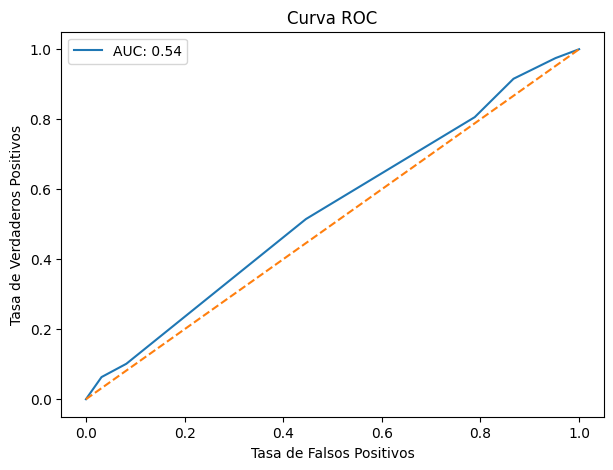

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Capacitaciones']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_capacitaciones = sm.Logit(y, X)
resultado = logit_model_capacitaciones.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Distancia_Casa

Optimization terminated successfully.
         Current function value: 0.438776
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.006607
Time:                        23:10:01   Log-Likelihood:                -645.00
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                  0.003399
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercepto        -1.8901      0.111    -16.969      0.000      -2.108      -1.672
Distancia_Casa   

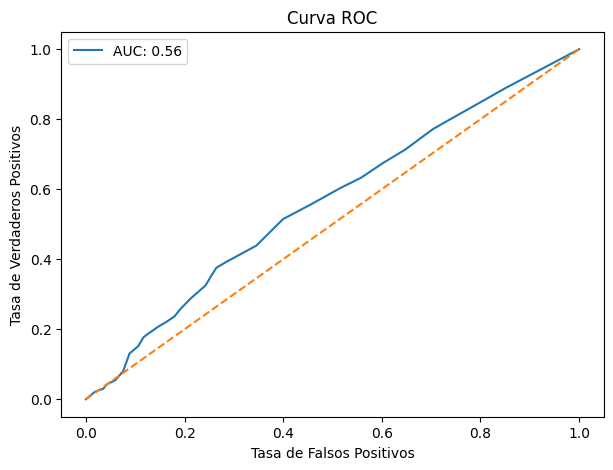

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Distancia_Casa']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_distancia_casa = sm.Logit(y, X)
resultado = logit_model_distancia_casa.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Educación

Optimization terminated successfully.
         Current function value: 0.441205
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.001109
Time:                        23:10:02   Log-Likelihood:                -648.57
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.2302
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercepto    -1.4106      0.209     -6.754      0.000      -1.820      -1.001
Educación     -0.0827      0.

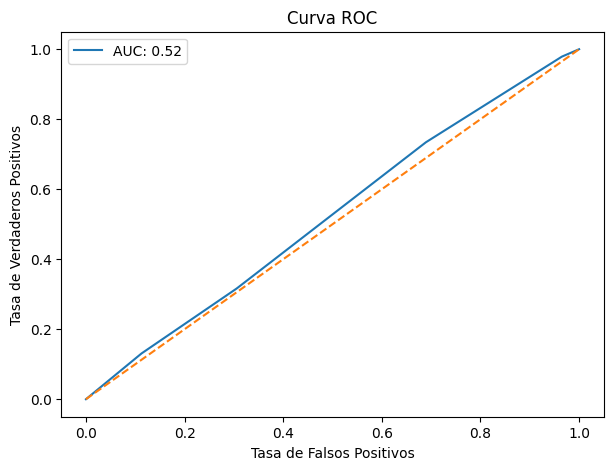

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Educación']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_educacion = sm.Logit(y, X)
resultado = logit_model_educacion.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Equilibrio_Trabajo_Vida

Optimization terminated successfully.
         Current function value: 0.439689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.004541
Time:                        23:10:02   Log-Likelihood:                -646.34
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.01517
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercepto                 -0.9974      0.272     -3.667      0.000      -1.530   

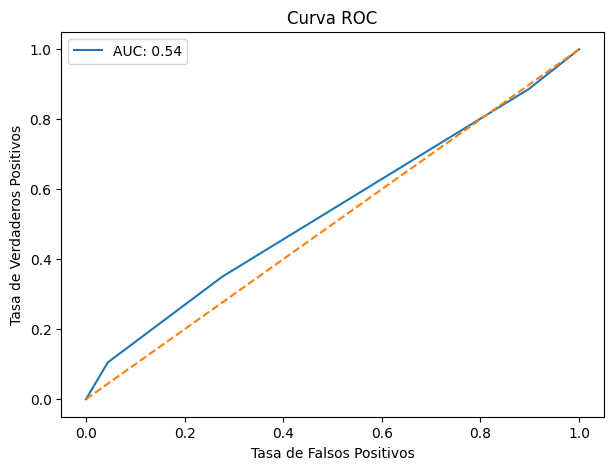

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Equilibrio_Trabajo_Vida']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_equilibrio_trabajo_vida = sm.Logit(y, X)
resultado = logit_model_equilibrio_trabajo_vida.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Porcentaje_aumento_salarial

Optimization terminated successfully.
         Current function value: 0.441603
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               0.0002071
Time:                        23:10:02   Log-Likelihood:                -649.16
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.6041
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercepto                     -1.4956      0.305     -4.910      0.000   

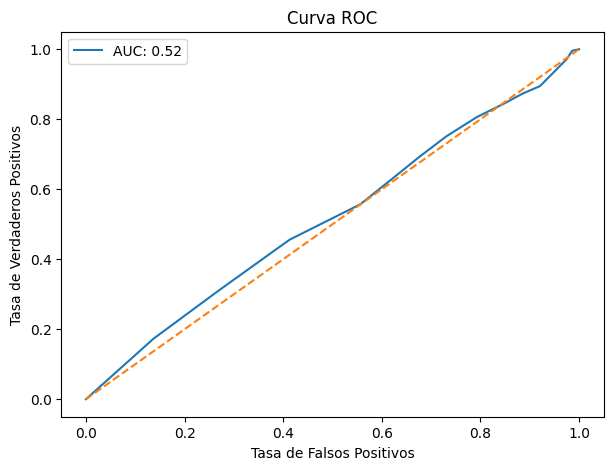

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Porcentaje_aumento_salarial']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_porcentaje_aumento_salarial = sm.Logit(y, X)
resultado = logit_model_porcentaje_aumento_salarial.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Rendimiento_Laboral

Optimization terminated successfully.
         Current function value: 0.441691
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               9.415e-06
Time:                        23:10:03   Log-Likelihood:                -649.29
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.9120
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercepto             -1.7175      0.621     -2.764      0.006      -2.936      -0.500
Re

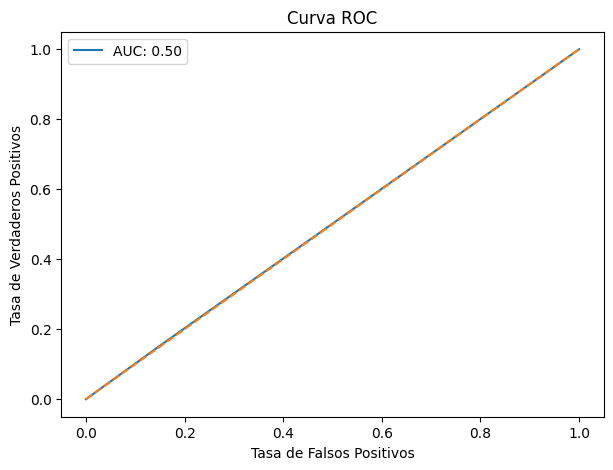

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Rendimiento_Laboral']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_rendimiento_laboral = sm.Logit(y, X)
resultado = logit_model_rendimiento_laboral.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Satisfacción_Ambiental

Optimization terminated successfully.
         Current function value: 0.436422
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01194
Time:                        23:10:03   Log-Likelihood:                -641.54
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.241e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercepto                -0.9862      0.177     -5.576      0.000      -1.333      

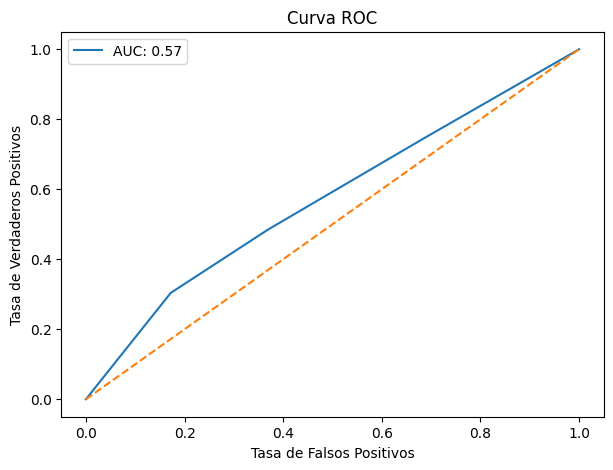

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Satisfacción_Ambiental']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_satisfaccion_ambiental = sm.Logit(y, X)
resultado = logit_model_satisfaccion_ambiental.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Satisfacción_Laboral

Optimization terminated successfully.
         Current function value: 0.436413
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01196
Time:                        23:10:03   Log-Likelihood:                -641.53
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.127e-05
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercepto             -0.9904      0.176     -5.635      0.000      -1.335      -0.646
Sa

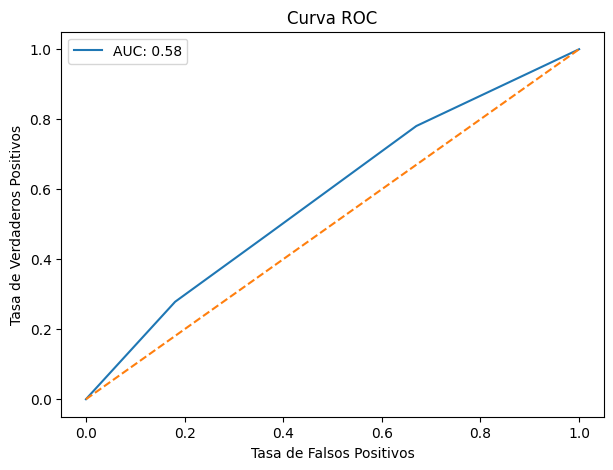

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Satisfación_Laboral']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_satisfaccion_laboral = sm.Logit(y, X)
resultado = logit_model_satisfaccion_laboral.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Ingreso_Mensual

Optimization terminated successfully.
         Current function value: 0.426223
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.03503
Time:                        23:10:04   Log-Likelihood:                -626.55
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.537e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercepto         -0.9291      0.129     -7.191      0.000      -1.182      -0.676
Ingreso_Mensua

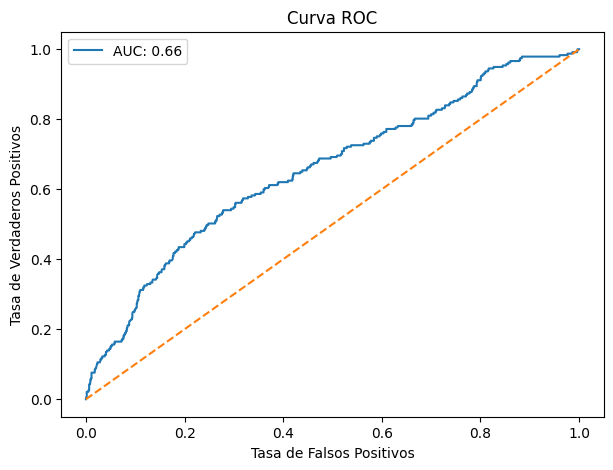

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Ingreso_Mensual']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_ingreso_mensual = sm.Logit(y, X)
resultado = logit_model_ingreso_mensual.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Trabajos _Anteriores

Optimization terminated successfully.
         Current function value: 0.440773
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.002088
Time:                        23:10:04   Log-Likelihood:                -647.94
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.09963
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercepto             -1.7765      0.106    -16.703      0.000      -1.985      -1.568
Tr

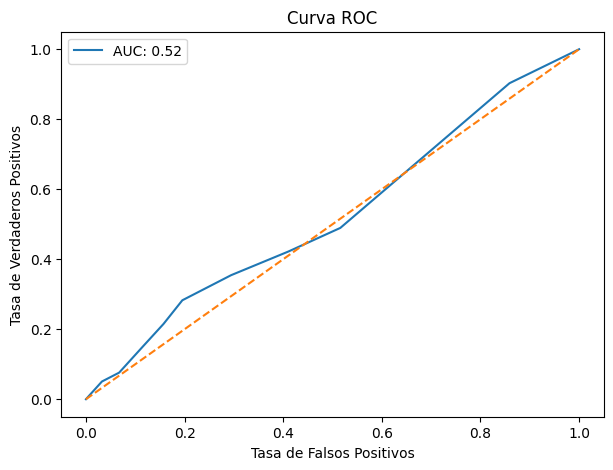

In [ ]:
# Especifica las variables dependiente e independientes
X = data[['Intercepto', 'Trabajos_Anteriores']]  # Variables independientes
y = data['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_trabajos_anteriores = sm.Logit(y, X)
resultado = logit_model_trabajos_anteriores.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



# ***Con variables cualitativas ***

# Primero convertimos todas las variables indepedientes categoricas a variables dummie y luego creamos un nuevo dataframe con estas.

In [ ]:
# Convertir las variables categóricas a variables dummy
data_2 = pd.get_dummies(data, columns=['Viaje de Negocios', 'Departamento',
                                         'Campo_Educación', 'Genero',
                                         'Cargo', 'Estado_Civil',
                                         'Horas_Extra'])

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Rotación                          1470 non-null   int64
 1   Edad                              1470 non-null   int64
 2   Distancia_Casa                    1470 non-null   int64
 3   Educación                         1470 non-null   int64
 4   Satisfacción_Ambiental            1470 non-null   int64
 5   Satisfación_Laboral               1470 non-null   int64
 6   Ingreso_Mensual                   1470 non-null   int64
 7   Trabajos_Anteriores               1470 non-null   int64
 8   Porcentaje_aumento_salarial       1470 non-null   int64
 9   Rendimiento_Laboral               1470 non-null   int64
 10  Años_Experiencia                  1470 non-null   int64
 11  Capacitaciones                    1470 non-null   int64
 12  Equilibrio_Trabajo_Vida           

In [ ]:
# Guardamos la nueva base de datoas en excel
from google.colab import files
data_2.to_excel('mi_archivo.xlsx', index=False)


In [ ]:
# Descarga el archivo Excel a tu computadora local
files.download('mi_archivo.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Viaje de negocios_Frecuentemente

Optimization terminated successfully.
         Current function value: 0.435639
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01371
Time:                        23:10:07   Log-Likelihood:                -640.39
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.447e-05
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercepto                          -1.8085      0.083    -21.72

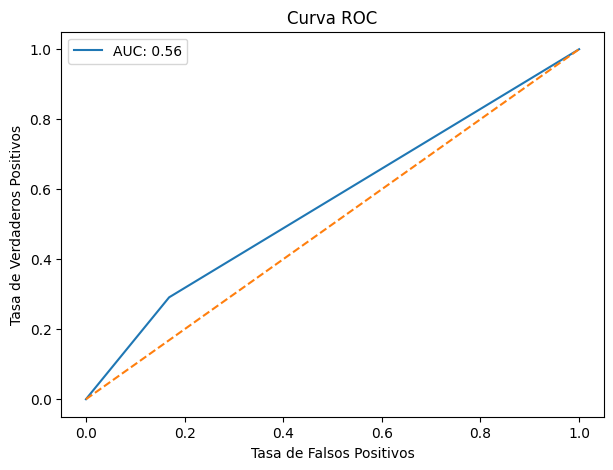

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Viaje de Negocios_Frecuentemente']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_viaje_de_negocios_frecuentemente = sm.Logit(y, X)
resultado = logit_model_viaje_de_negocios_frecuentemente.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Viaje de negocios_No_Viaja

Optimization terminated successfully.
         Current function value: 0.438460
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.007324
Time:                        23:10:07   Log-Likelihood:                -644.54
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                  0.002042
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercepto                    -1.5824      0.073    -21.619      0.000      

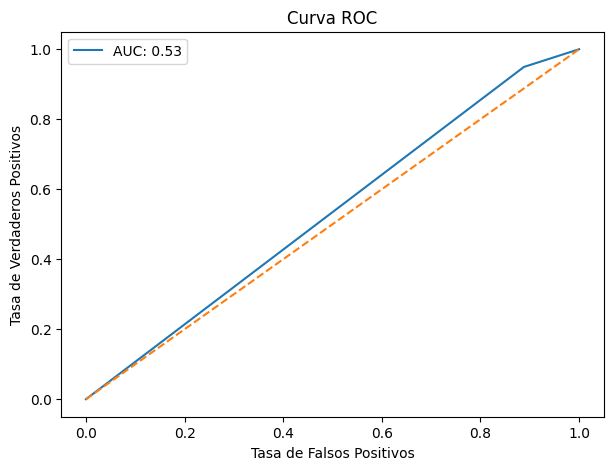

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Viaje de Negocios_No_Viaja']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_viaje_de_negocios_no_viaja = sm.Logit(y, X)
resultado = logit_model_viaje_de_negocios_no_viaja.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Viaje de negocios_Raramente

Optimization terminated successfully.
         Current function value: 0.440499
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.002708
Time:                        23:10:07   Log-Likelihood:                -647.53
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.06074
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercepto                     -1.4520      0.123    -11.763      0.000   

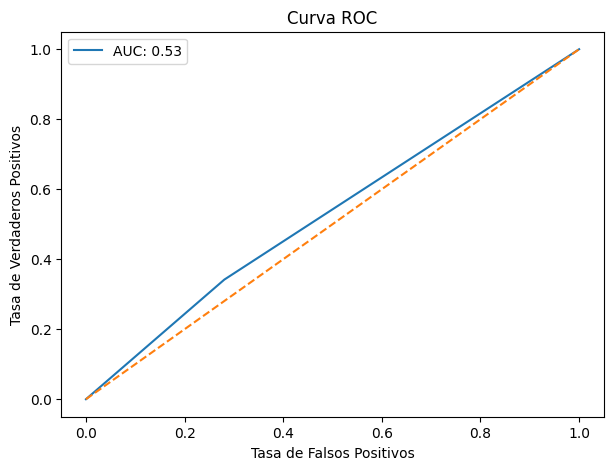

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Viaje de Negocios_Raramente']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_viaje_de_negocios_raramente = sm.Logit(y, X)
resultado = logit_model_viaje_de_negocios_raramente.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Departamento_IyD

Optimization terminated successfully.
         Current function value: 0.438156
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.008012
Time:                        23:10:08   Log-Likelihood:                -644.09
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                  0.001257
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercepto          -1.3595      0.110    -12.367      0.000      -1.575      -1.144
Departament

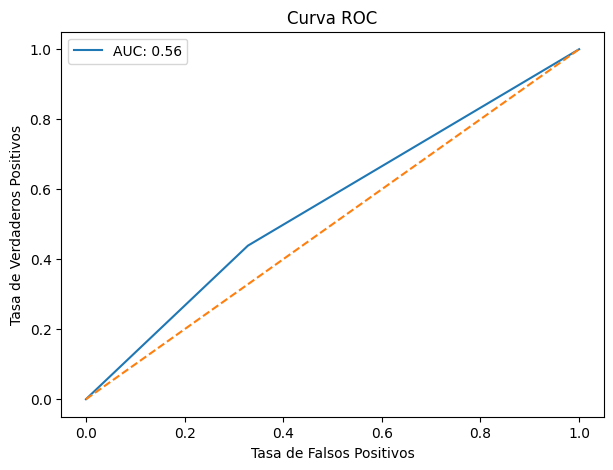

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Departamento_IyD']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Departamento_IyD = sm.Logit(y, X)
resultado = logit_model_Departamento_IyD.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Departamento_RH                   

Optimization terminated successfully.
         Current function value: 0.441559
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               0.0003070
Time:                        23:10:08   Log-Likelihood:                -649.09
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.5278
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercepto         -1.6589      0.073    -22.807      0.000      -1.801      -1.516
Departamento_R

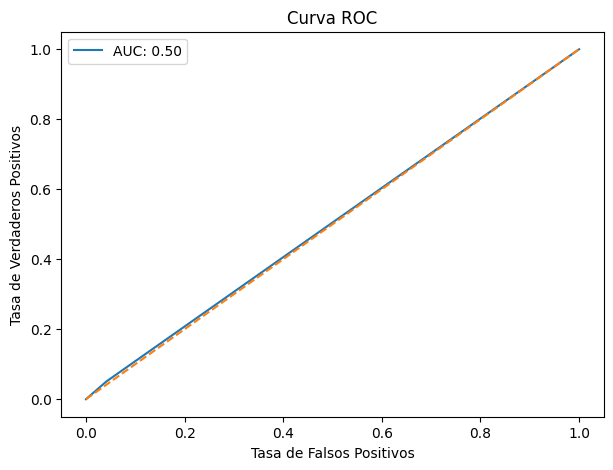

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Departamento_RH']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Departamento_RH = sm.Logit(y, X)
resultado = logit_model_Departamento_RH.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Departamento_Ventas               

Optimization terminated successfully.
         Current function value: 0.438541
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.007140
Time:                        23:10:08   Log-Likelihood:                -644.66
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                  0.002327
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercepto             -1.8021      0.090    -20.105      0.000      -1.978      -1.626
De

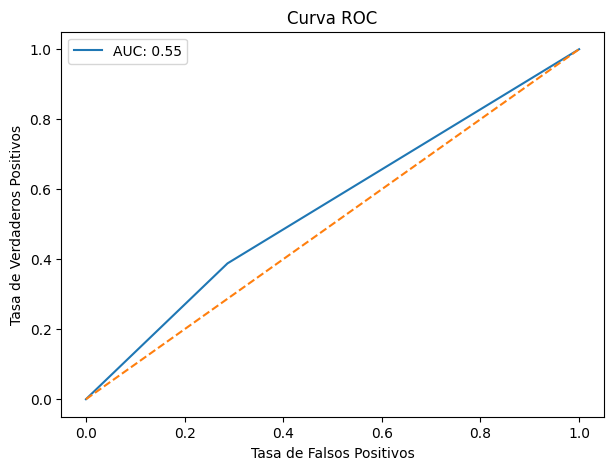

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Departamento_Ventas']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Departamento_Ventas = sm.Logit(y, X)
resultado = logit_model_Departamento_Ventas.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Campo_Educación_Ciencias          

Optimization terminated successfully.
         Current function value: 0.441156
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.001220
Time:                        23:10:09   Log-Likelihood:                -648.50
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.2081
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercepto                  -1.5765      0.090    -17.459      0.000      -1.753

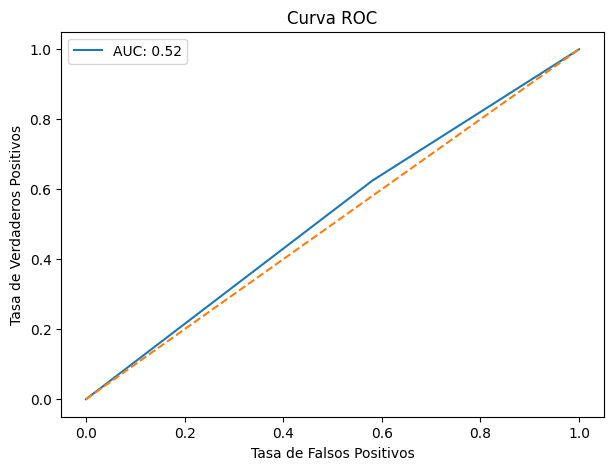

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Campo_Educación_Ciencias']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Campo_Educación_Ciencias = sm.Logit(y, X)
resultado = logit_model_Campo_Educación_Ciencias.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Campo_Educación_Humanidades       

Optimization terminated successfully.
         Current function value: 0.441112
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.001320
Time:                        23:10:09   Log-Likelihood:                -648.43
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.1904
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercepto                     -1.6628      0.072    -23.120      0.000   

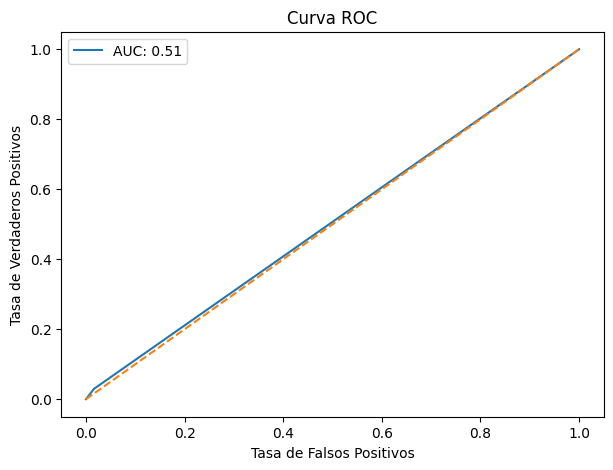

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Campo_Educación_Humanidades']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Campo_Educación_Humanidades = sm.Logit(y, X)
resultado = logit_model_Campo_Educación_Humanidades.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Campo_Educación_Mercadeo

Optimization terminated successfully.
         Current function value: 0.440252
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.003267
Time:                        23:10:09   Log-Likelihood:                -647.17
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.03944
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercepto                  -1.7029      0.076    -22.261      0.000      -1.853

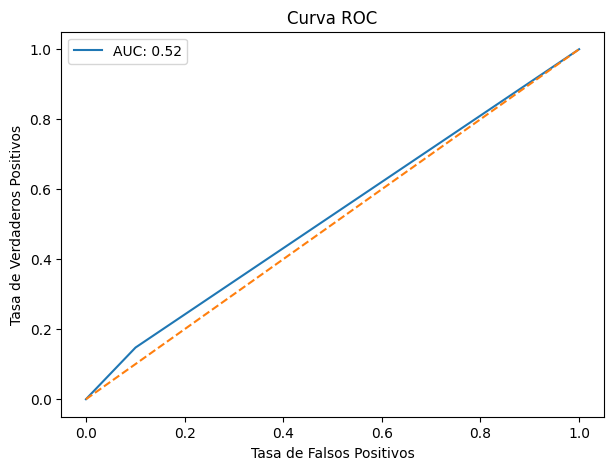

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Campo_Educación_Mercadeo']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Campo_Educación_Mercadeo = sm.Logit(y, X)
resultado = logit_model_Campo_Educación_Mercadeo.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Campo_Educación_Otra

Optimization terminated successfully.
         Current function value: 0.441527
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               0.0003795
Time:                        23:10:10   Log-Likelihood:                -649.04
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.4826
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercepto              -1.6374      0.073    -22.522      0.000      -1.780      -1.495

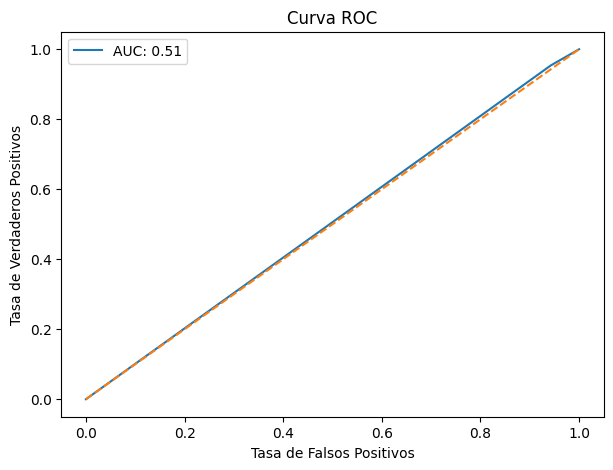

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Campo_Educación_Otra']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Campo_Educación_Otra = sm.Logit(y, X)
resultado = logit_model_Campo_Educación_Otra.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Campo_Educación_Salud             

Optimization terminated successfully.
         Current function value: 0.440562
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.002565
Time:                        23:10:10   Log-Likelihood:                -647.63
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.06800
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercepto               -1.5648      0.083    -18.771      0.000      -1.728      -1.

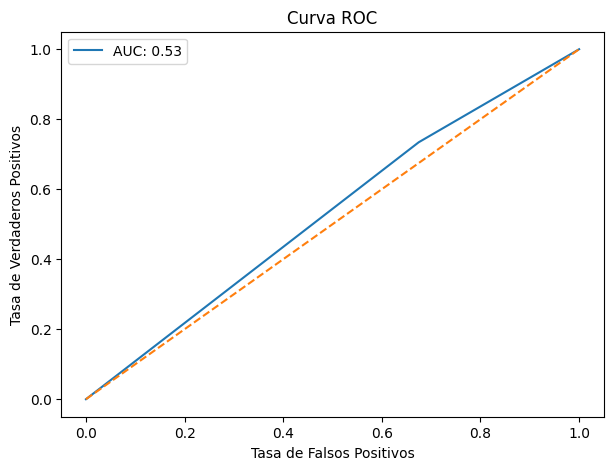

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Campo_Educación_Salud']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Campo_Educación_Salud = sm.Logit(y, X)
resultado = logit_model_Campo_Educación_Salud.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Campo_Educación_Tecnicos          

Optimization terminated successfully.
         Current function value: 0.439523
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.004917
Time:                        23:10:11   Log-Likelihood:                -646.10
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.01151
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercepto                  -1.7096      0.076    -22.525      0.000      -1.858

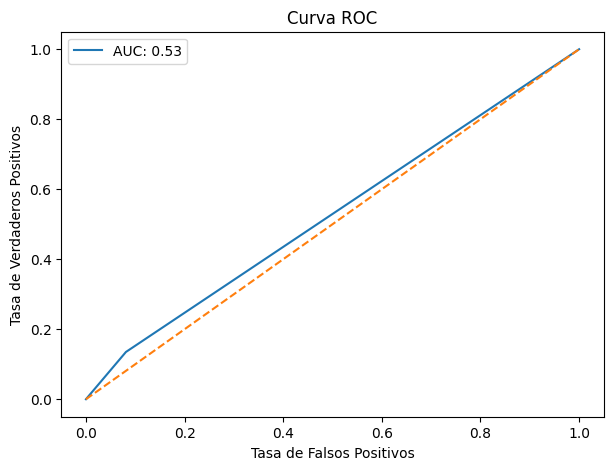

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Campo_Educación_Tecnicos']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Campo_Educación_Tecnicos = sm.Logit(y, X)
resultado = logit_model_Campo_Educación_Tecnicos.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Genero_F

Optimization terminated successfully.
         Current function value: 0.441258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               0.0009900
Time:                        23:10:11   Log-Likelihood:                -648.65
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.2569
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercepto    -1.5851      0.090    -17.686      0.000      -1.761      -1.409
Genero_F      -0.1656      0.

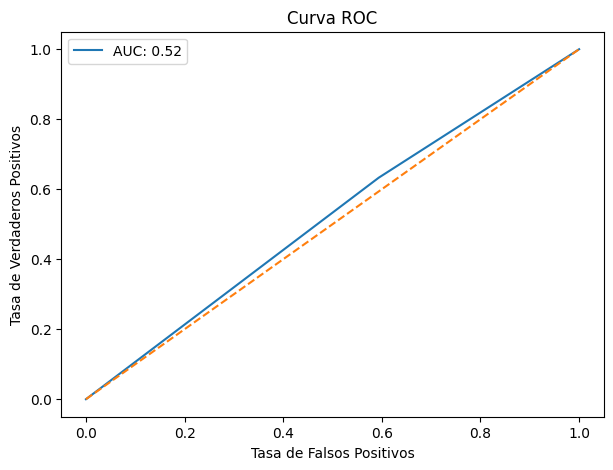

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Genero_F']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Genero_F = sm.Logit(y, X)
resultado = logit_model_Genero_F.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Genero_M                          

Optimization terminated successfully.
         Current function value: 0.441258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               0.0009900
Time:                        23:10:11   Log-Likelihood:                -648.65
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.2569
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercepto    -1.7507      0.116    -15.073      0.000      -1.978      -1.523
Genero_M       0.1656      0.

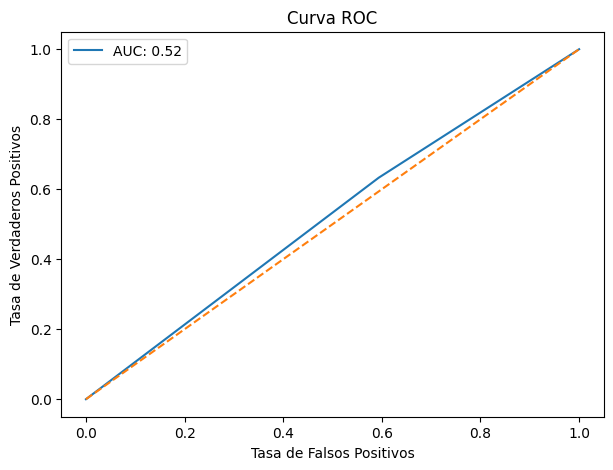

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Genero_M']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Genero_M = sm.Logit(y, X)
resultado = logit_model_Genero_M.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Director_Investigación      

Optimization terminated successfully.
         Current function value: 0.436033
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01282
Time:                        23:10:12   Log-Likelihood:                -640.97
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 4.506e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercepto                      -1.5923      0.072    -22.250      0.000

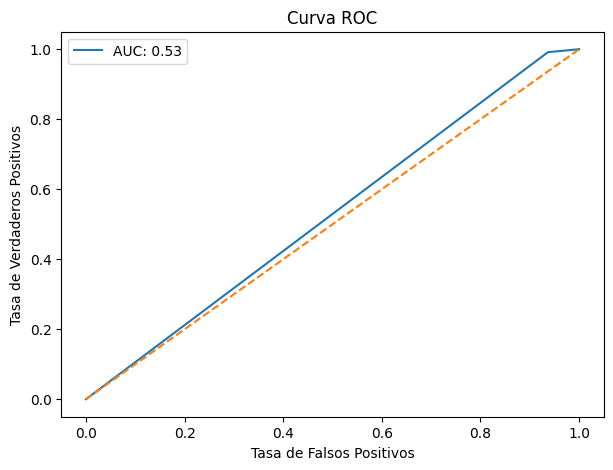

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Director_Investigación']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Director_Investigación = sm.Logit(y, X)
resultado = logit_model_Cargo_Director_Investigación.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Director_Manufactura

Optimization terminated successfully.
         Current function value: 0.437554
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.009375
Time:                        23:10:12   Log-Likelihood:                -643.20
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 0.0004846
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercepto                    -1.5763      0.073    -21.619      0.000      

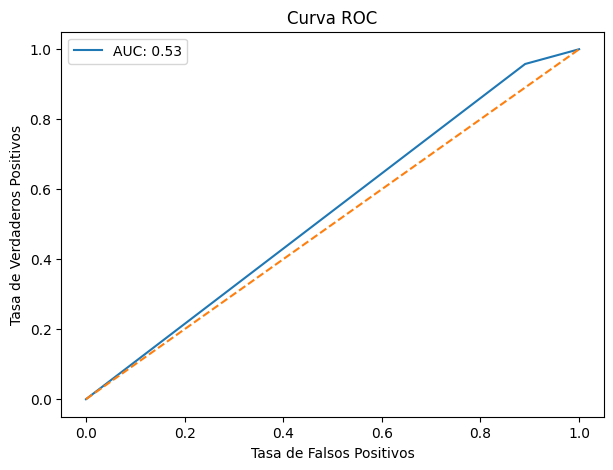

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Director_Manofactura']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Director_Manofactura = sm.Logit(y, X)
resultado = logit_model_Cargo_Director_Manofactura.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Ejecutivo_Ventas

Optimization terminated successfully.
         Current function value: 0.441502
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               0.0004358
Time:                        23:10:12   Log-Likelihood:                -649.01
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.4519
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercepto                -1.6781      0.081    -20.668      0.000      -1.837      

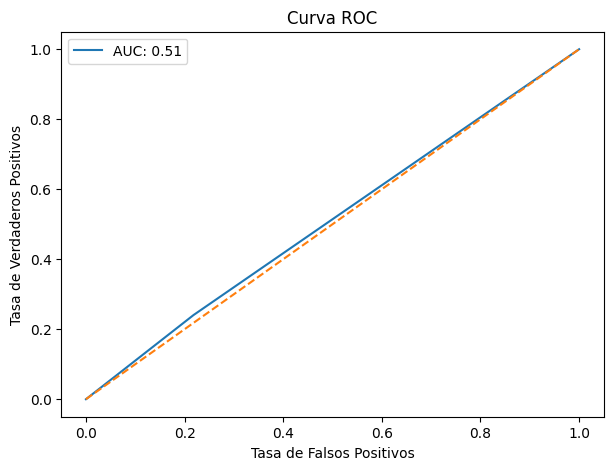

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Ejecutivo_Ventas']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Ejecutivo_Ventas = sm.Logit(y, X)
resultado = logit_model_Cargo_Ejecutivo_Ventas.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Gerente

Optimization terminated successfully.
         Current function value: 0.437222
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01013
Time:                        23:10:13   Log-Likelihood:                -642.72
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 0.0002876
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercepto       -1.5885      0.072    -22.049      0.000      -1.730      -1.447
Cargo_Gerente    -1.

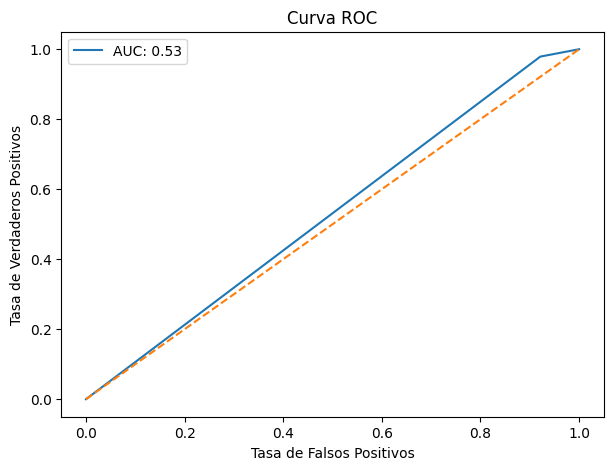

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Gerente']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Gerente = sm.Logit(y, X)
resultado = logit_model_Cargo_Gerente.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Investigador_Cientifico     

Optimization terminated successfully.
         Current function value: 0.441695
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               1.465e-07
Time:                        23:10:13   Log-Likelihood:                -649.29
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.9890
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercepto                       -1.6487      0.079    -20.812      0.

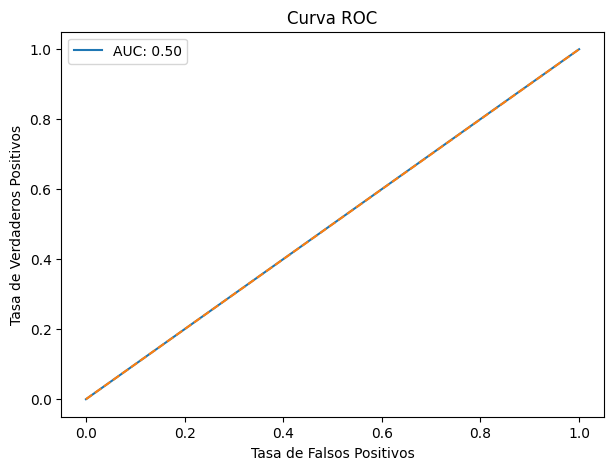

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Investigador_Cientifico']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Investigador_Cientifico = sm.Logit(y, X)
resultado = logit_model_Cargo_Investigador_Cientifico.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Recursos_Humanos

Optimization terminated successfully.
         Current function value: 0.441099
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.001349
Time:                        23:10:13   Log-Likelihood:                -648.42
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.1857
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercepto                -1.6681      0.073    -22.951      0.000      -1.811      

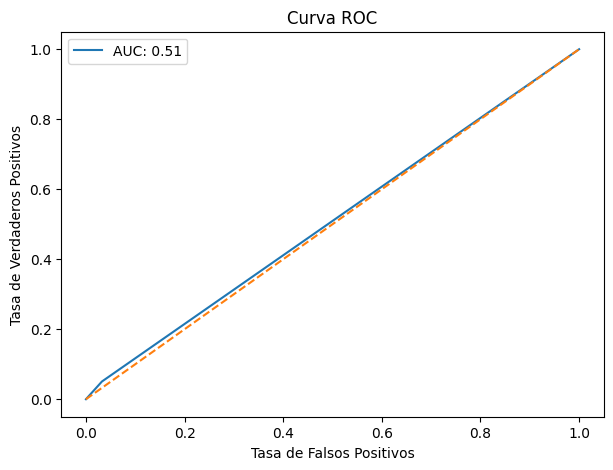

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Recursos_Humanos']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Recursos_Humanos = sm.Logit(y, X)
resultado = logit_model_Cargo_Recursos_Humanos.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Representante_Salud         

Optimization terminated successfully.
         Current function value: 0.437961
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.008452
Time:                        23:10:14   Log-Likelihood:                -643.80
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 0.0009229
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercepto                   -1.5837      0.073    -21.782      0.000      -1.

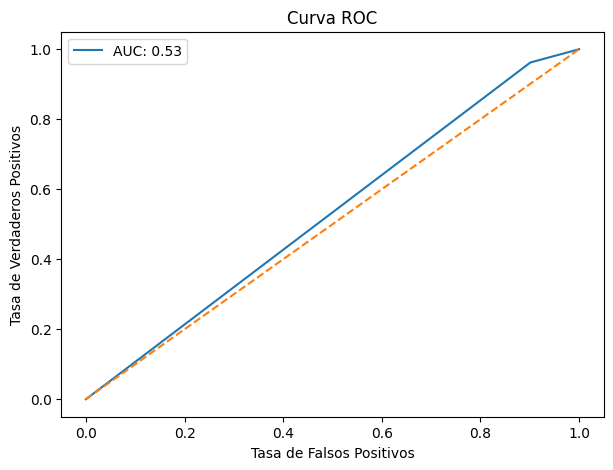

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Representante_Salud']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Representante_Salud = sm.Logit(y, X)
resultado = logit_model_Cargo_Representante_Salud.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Representante_Ventas        

Optimization terminated successfully.
         Current function value: 0.431975
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.02201
Time:                        23:10:14   Log-Likelihood:                -635.00
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 9.012e-08
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercepto                    -1.7577      0.076    -23.185      0.000      

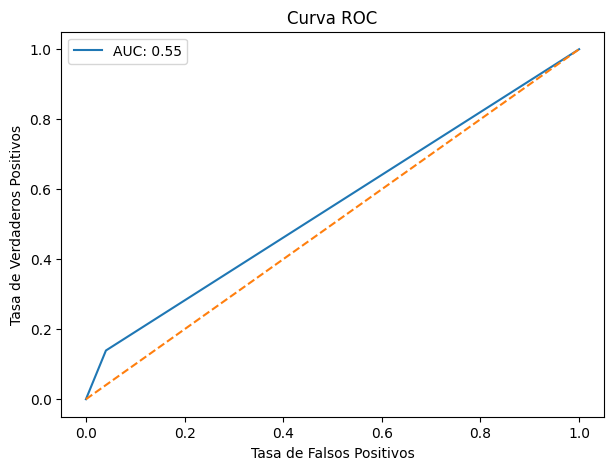

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Representante_Ventas']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Representante_Ventas = sm.Logit(y, X)
resultado = logit_model_Cargo_Representante_Ventas.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Cargo_Tecnico_Laboratorio         

Optimization terminated successfully.
         Current function value: 0.437256
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01005
Time:                        23:10:14   Log-Likelihood:                -642.77
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 0.0003032
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercepto                   -1.7783      0.082    -21.759      0.000      -1.

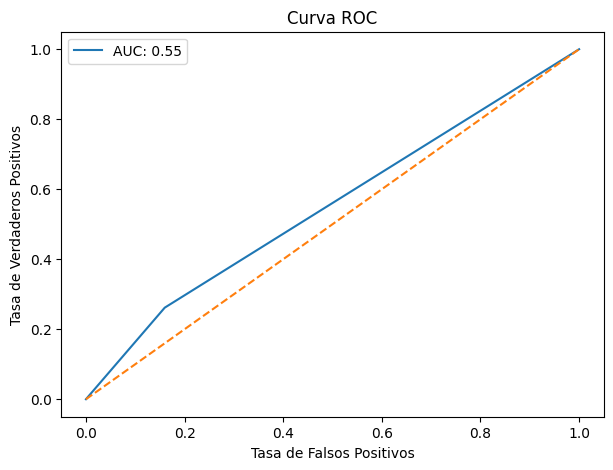

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Cargo_Tecnico_Laboratorio']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Cargo_Tecnico_Laboratorio = sm.Logit(y, X)
resultado = logit_model_Cargo_Tecnico_Laboratorio.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Estado_Civil_Casado    

Optimization terminated successfully.
         Current function value: 0.437489
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.009521
Time:                        23:10:15   Log-Likelihood:                -643.11
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 0.0004376
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercepto             -1.4373      0.090    -15.981      0.000      -1.614      -1.261
Es

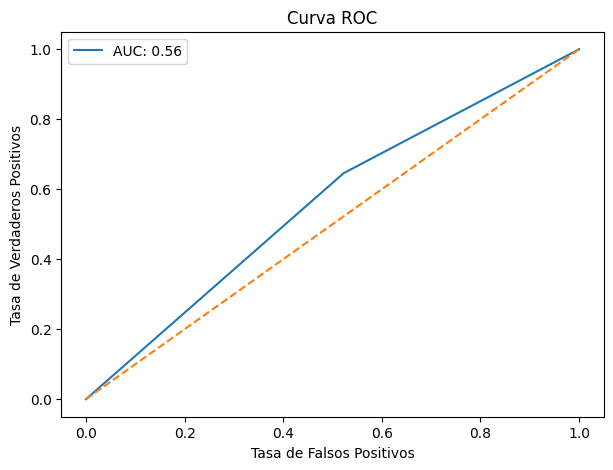

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Estado_Civil_Casado']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Estado_Civil_Casado = sm.Logit(y, X)
resultado = logit_model_Estado_Civil_Casado.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Estado_Civil_Divorciado

Optimization terminated successfully.
         Current function value: 0.437493
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.009512
Time:                        23:10:15   Log-Likelihood:                -643.12
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 0.0004404
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercepto                 -1.5267      0.077    -19.764      0.000      -1.678   

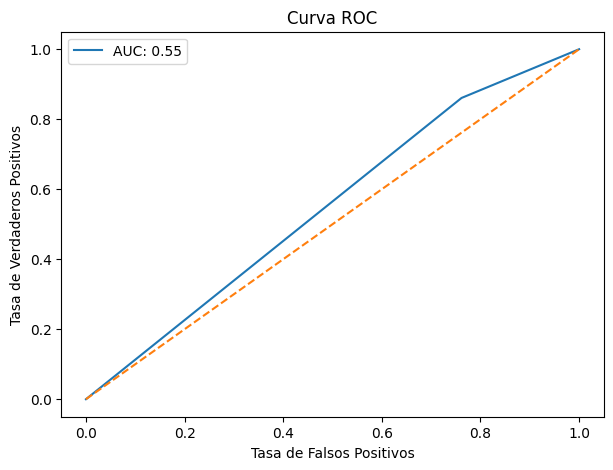

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Estado_Civil_Divorciado']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Estado_Civil_Divorciado = sm.Logit(y, X)
resultado = logit_model_Estado_Civil_Divorciado.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Estado_Civil_Soltero              

Optimization terminated successfully.
         Current function value: 0.427152
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.03292
Time:                        23:10:16   Log-Likelihood:                -627.91
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.202e-11
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercepto              -2.0212      0.098    -20.543      0.000      -2.214      -1.828

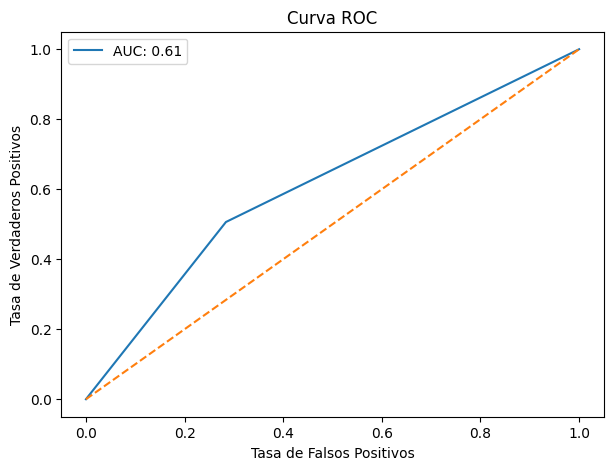

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Estado_Civil_Soltero']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Estado_Civil_Soltero = sm.Logit(y, X)
resultado = logit_model_Estado_Civil_Soltero.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Horas_Extra_No

Optimization terminated successfully.
         Current function value: 0.414007
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.06268
Time:                        23:10:16   Log-Likelihood:                -608.59
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.842e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercepto        -0.8222      0.106     -7.723      0.000      -1.031      -0.614
Horas_Extra_No   

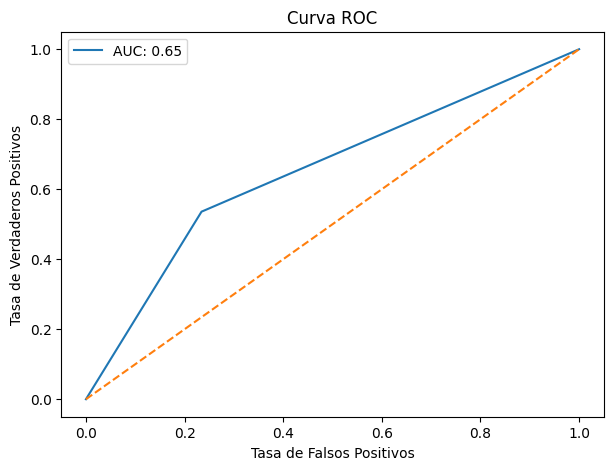

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Horas_Extra_No']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Horas_Extra_No = sm.Logit(y, X)
resultado = logit_model_Horas_Extra_No.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Horas_Extra_Si                    

Optimization terminated successfully.
         Current function value: 0.414007
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.06268
Time:                        23:10:16   Log-Likelihood:                -608.59
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.842e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercepto        -2.1496      0.101    -21.337      0.000      -2.347      -1.952
Horas_Extra_Si   

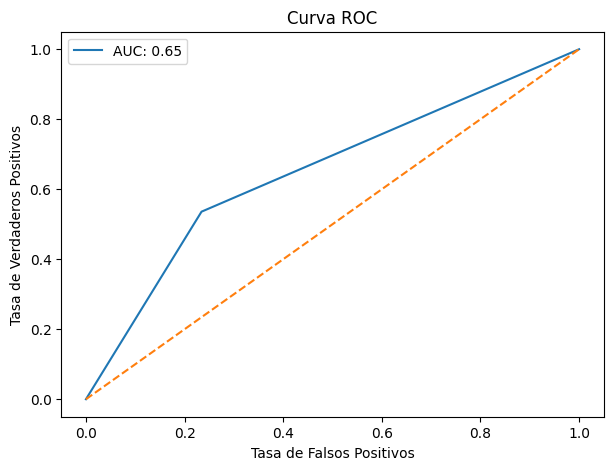

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Horas_Extra_Si']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_Horas_Extra_Si = sm.Logit(y, X)
resultado = logit_model_Horas_Extra_Si.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

**Comentario Analisis Bivariado:**

De las 6 variables propuestas en el punto 2, se encontró significancia estadística en el modelo (p< 0.05) de análisis bivariado (regresión logistica) en las variables numéricas edad y capacitaciones. No fue así para la variable  trabajos anteriores. En las variables categóricas se logró significancia estadistica con  estado civil y viaje de negocios (frecuentemente y no viaja). No ocurrió lo mismo con la variable género.

**Interpetacion coeficientes: **
En un modelo de regresión logística lo importante es modelar la probabilidad log-odds de que la variable dependiente (generalmente binaria, tomando valores de 0 o 1) sea igual a 1. Para este fin empleamos los coeficientes de cada una de las variables.

Si se tiene una variable categórica (como género o estado civil) representada por variables dummy, el coeficiente indica cómo cambian las log-odds respecto a la categoría de referencia. Por ejemplo, si el coeficiente para "Género = Masculino" es 0.5, entonces las log-odds de la ocurrencia del evento (i.e., la variable dependiente es igual a 1) para los hombres son 0.5 unidades más altas que para las mujeres (si las mujeres son la categoría de referencia).

Si se tiene una variable continua, como la edad, el coeficiente indica cómo cambian las log-odds de la ocurrencia del evento por cada unidad adicional de la variable. Si el coeficiente de "Edad" es -0.2, por ejemplo, eso significa que un año adicional de edad está asociado con una disminución de 0.2 en las log-odds de que la variable dependiente sea 1, manteniendo constantes las demás variables.

# **4. Estimación del modelo de regresión**
Realiza la estimación de un modelo de regresión logístico en el cual la variable respuesta es rotacion (y=1  es si rotación, y=0
 es no rotación) y las covariables las 6 seleccionadas en el punto 1. Interprete los coeficientes del modelo y la significancia de los parámetros.

***Para construir el modelo de regresión logistica multivariable (6 variables de interés) empleamos el dataframe data_2 que ya contiene las variables categoricas como dummies. Usaremos statsmodels. ***

Optimization terminated successfully.
         Current function value: 0.400271
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1461
Method:                           MLE   Df Model:                            8
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.09378
Time:                        23:10:17   Log-Likelihood:                -588.40
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.418e-22
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercepto                           0.1097        nan        na

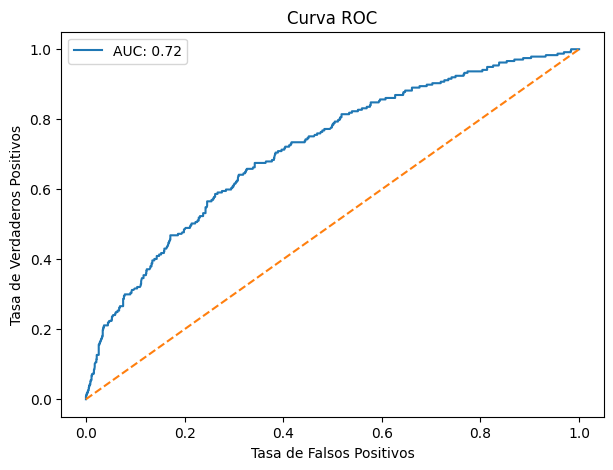

In [ ]:
# Especifica las variables dependiente e independientes
X = data_2[['Intercepto', 'Genero_F', 'Genero_M', 'Estado_Civil_Casado',
            'Estado_Civil_Divorciado','Estado_Civil_Soltero',
            'Viaje de Negocios_Frecuentemente',
            'Viaje de Negocios_No_Viaja',
            'Viaje de Negocios_Raramente',
            'Edad', 'Trabajos_Anteriores', 'Capacitaciones']]  # Variables independientes
y = data_2['Rotación']  # Variable dependient

# Ajusta el modelo de regresión logística
logit_model_multivariables = sm.Logit(y, X)
resultado = logit_model_multivariables.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

**Comentario:** **Explicación de los Coeficientes y su valor de p:**

Solo las variables ***Edad, Trabajos_Anteriores y Capacitaciones lograron significancia estadistica*** (p< 0.05) para ganarse su puesto en el modelo de regresión. A continuación se explican los coeficientes de todas las variables del modelo en funcion del OR, métrica que permite mejor interpretación y  visión más directa de cómo cada variable afecta el odds del evento. Es común exponenciar los coeficientes para obtener los Odds Ratios.

**Genero_F: -0.060581, OR = 0.94. **
El odds de que el evento de interés ocurra es un 6% menor para las mujeres en comparación con el grupo de referencia, manteniendo las demás variables constantes.

**Genero_M: 0.170250, OR = 1.19**
Los hombres tienen 1.19 veces las odds de experimentar el evento en comparación con el grupo de referencia, manteniendo constantes las demás variables.

**Estado_Civil_Casado: -0.132998, OR = 0.88**
Las personas casadas tienen un 12% menos de odds de experimentar el evento en comparación con la categoría de referencia.

**Estado_Civil_Divorciado: -0.423662**, OR = 0.65** **texto en negrita**
Las personas divorciadas tienen un 35% menos de odds de experimentar el evento en comparación con la categoría de referencia, ceteris paribus.

**Estado_Civil_Soltero: 0.666329, OR = 1.95 **
Las personas solteras tienen 1.95 veces las odds de experimentar el evento en comparación con la categoría de referencia, manteniendo las demás variables constantes.

**Viaje de Negocios_Frecuentemente: 0.747388, OR = 2.11**
Viajar frecuentemente por negocios está asociado con 2.11 veces el odds de experimentar el evento en comparación con no viajar.

**Viaje de Negocios_No_Viaja: -0.711171, OR = 0.49 **
No viajar por negocios está asociado con un 51% menos de odds de experimentar el evento en comparación con la categoría de referencia.

**Viaje de Negocios_Raramente: 0.073451, OR = 1.08**
Viajar raramente por negocios está asociado con 1.08 veces las odds de experimentar el evento en comparación con la categoría de referencia.

**Edad: -0.058085, OR = 0.94**
Cada año adicional de edad está asociado con un 6% menos de odds de experimentar el evento, manteniendo constantes las demás variables.

**Trabajos_Anteriores: 0.118990, OR = 1.13**
Cada trabajo adicional previo está asociado con 1.13 veces las odds de experimentar el evento, manteniendo constantes las demás variables.

**Capacitaciones: -0.146500, OR = 0.86**
Cada capacitación adicional está asociada con un 14% menos de odds de experimentar el evento, manteniendo las demás variables constantes.


# **5. Evaluación**
Evaluar el poder predictivo del modelo con base en la curva ROC y el AUC.


AUC: 0.72


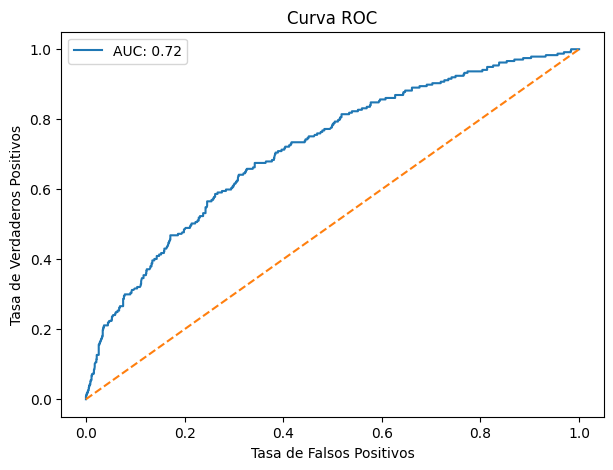

In [ ]:
# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

**Comentario:** La capacidad predictiva del modelo es aceptable/moderada dado el  AUROC de 0.72. Esto significa que la probabilidad de clasificar adecuadamente a los empleados en cuanto a la probabilidad de rotación en su cargo es del 72%.

# **6. Predicciones**
Realiza una predicción la probabilidad de que un individuo (hipotético) rote y defina un corte para decidir si se debe intervenir a este empleado o no (posible estrategia para motivar al empleado).



In [282]:
X = data_2[['Genero_F', 'Genero_M', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
        'Estado_Civil_Soltero', 'Viaje de Negocios_Frecuentemente', 'Viaje de Negocios_No_Viaja',
        'Viaje de Negocios_Raramente', 'Edad', 'Trabajos_Anteriores', 'Capacitaciones']]
X = sm.add_constant(X)
y = data_2['Rotación']

In [283]:
# Ajustar el modelo
modelo = sm.Logit(y, X)
resultado = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.400271
         Iterations 7


In [284]:
# Obtener los coeficientes del modelo
coef = resultado.params
print(coef)


const                               0.109668
Genero_F                           -0.060581
Genero_M                            0.170250
Estado_Civil_Casado                -0.132998
Estado_Civil_Divorciado            -0.423662
Estado_Civil_Soltero                0.666329
Viaje de Negocios_Frecuentemente    0.747388
Viaje de Negocios_No_Viaja         -0.711171
Viaje de Negocios_Raramente         0.073451
Edad                               -0.058085
Trabajos_Anteriores                 0.118990
Capacitaciones                     -0.146500
dtype: float64


In [285]:
# Construir la fórmula de la probabilidad
variables = ['Genero_F', 'Genero_M', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
             'Estado_Civil_Soltero', 'Viaje de Negocios_Frecuentemente', 'Viaje de Negocios_No_Viaja',
             'Viaje de Negocios_Raramente', 'Edad', 'Trabajos_Anteriores', 'Capacitaciones']

In [286]:
formula = "P(Y=1) = 1 / (1 + exp(-("
formula += f"{coef['const']}"
for var in variables:
    formula += f" + {coef[var]}*{var}"
formula += ")))"

In [287]:
print("Fórmula de la probabilidad:")
print(formula)

Fórmula de la probabilidad:
P(Y=1) = 1 / (1 + exp(-(0.10966828964431778 + -0.060580935900601506*Genero_F + 0.1702498013433644*Genero_M + -0.1329984721427154*Estado_Civil_Casado + -0.4236619660460368*Estado_Civil_Divorciado + 0.666329356598003*Estado_Civil_Soltero + 0.7473882804280088*Viaje de Negocios_Frecuentemente + -0.7111714842943422*Viaje de Negocios_No_Viaja + 0.07345115859194712*Viaje de Negocios_Raramente + -0.05808455532949915*Edad + 0.11898966654193689*Trabajos_Anteriores + -0.14649981388612293*Capacitaciones)))


# Ejemplo: Hombre de 50 años, casado, con viajes de negocios frecuentes quien ha tenido 3 trabajos anteriores y 6 capacitaciones. ***

In [289]:
# Coeficientes
beta = {
    'intercepto': 0.109668,
    'Genero_M': 0.170250,
    'Edad': -0.058084,
    'Estado_Civil_Casado': -0.132998,
    'Viaje de Negocios_Frecuentemente': 0.747388,
    'Trabajos_Anteriores': 0.118990,
    'Capacitaciones': -0.146500
}

In [290]:
# Variables
X = {
    'Genero_M': 1,
    'Edad': 50,
    'Estado_Civil_Casado': 1,
    'Viaje de Negocios_Frecuentemente': 1,
    'Trabajos_Anteriores': 3,
    'Capacitaciones': 6
}

In [291]:
# Calculando la potencia
potencia = beta['intercepto'] + sum(beta[var] * X[var] for var in X)
potencia

-2.5319220000000002

In [292]:
# Calculando la probabilidad de Rotación
probabilidad_de_rotación = 1 / (1 + np.exp(-potencia))

In [293]:
print(f"La probabilidad predicha de rotación es {probabilidad_de_rotación:.2f}")

La probabilidad predicha de rotación es 0.07


**Respuesta:** Para el caso hipotético presentado no habria razón para preocuparse por el riesgo de rotación del empleado pues la probabilidiad para este evento es baja (7%). Esta conclusión está soportada también por la selección de un umbral de decisión del 50% y la asunción de que la capacidad de clasificar del modelo desarrollado es aceptable (AUROC > 0.7).

# **7. Conclusiones**

En las conclusiones adicione una discución sobre cuál sería la estrategia para disminuir la rotación en la empresa (con base en las variables que resultaron significativas en el punto 3).



**Comentario 1**: Es  necesairo construir un nuevo modelo de regresión multivariante  con las variables que lograron significancia estadistica en el modelo bivariado del punto 3. Este proceso se muestra a continuación:

# **Modelo multivariado 1** (incluye las variables que lograron significancia estadistica en el punto 3 de analisis bivariado)

In [278]:
# Especificar las variables independientes (X) y la variable dependiente (y)
variables_independientes = [
    'Edad', 'Distancia_Casa', 'Satisfacción_Ambiental', 'Satisfación_Laboral',
    'Ingreso_Mensual', 'Años_Experiencia', 'Capacitaciones', 'Equilibrio_Trabajo_Vida',
    'Antigüedad', 'Antigüedad_Cargo', 'Años_ultima_promoción', 'Años_acargo_con_mismo_jefe',
    'Intercepto', 'Viaje de Negocios_Frecuentemente', 'Viaje de Negocios_No_Viaja',
    'Departamento_IyD', 'Departamento_Ventas', 'Campo_Educación_Mercadeo',
    'Campo_Educación_Otra', 'Campo_Educación_Salud', 'Campo_Educación_Tecnicos',
    'Cargo_Director_Investigación', 'Cargo_Director_Manofactura', 'Cargo_Gerente',
    'Cargo_Investigador_Cientifico', 'Cargo_Representante_Salud',
    'Cargo_Representante_Ventas', 'Cargo_Tecnico_Laboratorio', 'Estado_Civil_Casado',
    'Estado_Civil_Divorciado', 'Estado_Civil_Soltero', 'Horas_Extra_No', 'Horas_Extra_Si'
]


Optimization terminated successfully.
         Current function value: 0.313430
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           30
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.2904
Time:                        23:29:54   Log-Likelihood:                -460.74
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.156e-61
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Edad                                -0.0274      0.013     -2.1

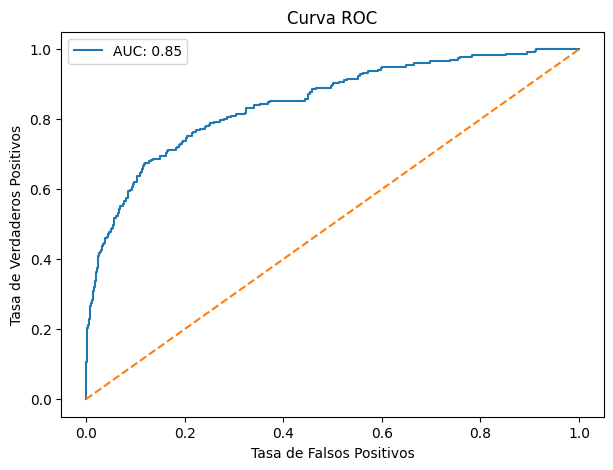

In [279]:
X = data_2[variables_independientes]
X = sm.add_constant(X)  # Añadir el intercepto
y = data_2['Rotación']

# Ajusta el modelo de regresión logística
logit_model_multivariables = sm.Logit(y, X)
resultado = logit_model_multivariables.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# **Modelo multivariado 2** (incluye las variables que lograron significancia estadistica en el Modelo multivariado 1).

In [280]:
# Especificar las variables independientes (X) y la variable dependiente (y)
variables_independientes_2 = [
    'Edad', 'Distancia_Casa', 'Satisfacción_Ambiental',
    'Satisfación_Laboral', 'Capacitaciones', 'Equilibrio_Trabajo_Vida', 'Antigüedad_Cargo',
    'Años_ultima_promoción', 'Años_acargo_con_mismo_jefe', 'Intercepto',
    'Viaje de Negocios_Frecuentemente', 'Viaje de Negocios_No_Viaja',
    'Cargo_Representante_Ventas'
]

Optimization terminated successfully.
         Current function value: 0.379276
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rotación   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                           12
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.1413
Time:                        23:44:46   Log-Likelihood:                -557.54
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.117e-33
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Edad                                -0.0439      0.009     -4.70

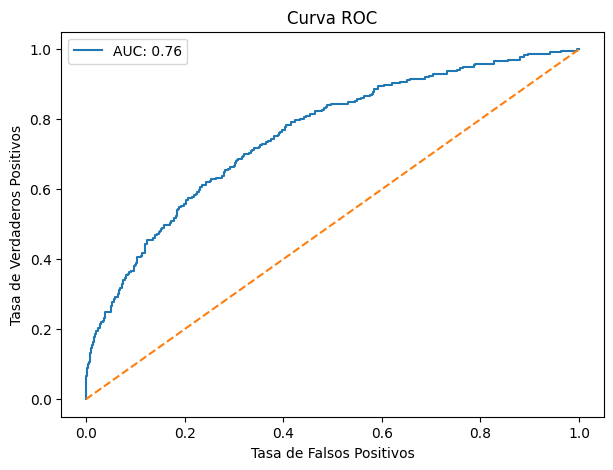

In [281]:
X = data_2[variables_independientes_2]
X = sm.add_constant(X)  # Añadir el intercepto
y = data_2['Rotación']

# Ajusta el modelo de regresión logística
logit_model_multivariables_2 = sm.Logit(y, X)
resultado = logit_model_multivariables_2.fit()

# Muestra un resumen del modelo
print(resultado.summary())

# Acceder y imprimir específicamente el LLR chi2 y su p-valor
print("LLR chi2: ", resultado.llr)
print("P-valor de LLR chi2: ", resultado.llr_pvalue)

# Mostrar R^2 de McFadden
print(f"\nR^2 de McFadden: {resultado.prsquared:.3f}")

# Coeficientes
print("\nCoeficientes:")
print(resultado.params)

# Odds Ratio
print("\nOdds Ratio:")
print(np.exp(resultado.params))

# Intervalo de confianza
print("\nIntervalo de Confianza:")
print(resultado.conf_int())

# Predicciones
predicciones = resultado.predict(X)

# Precisión
precisión = accuracy_score(y, round(predicciones))
print(f"\nPrecisión: {precisión:.2f}")

# AUC
auc = roc_auc_score(y, predicciones)
print(f"\nAUC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, predicciones)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

**Comentario 2:** Se recomienda emplear el modelo 2 que incluye las variables que lograron significancia estadistica del modelo 1. Estas son: Edad,Distancia_Casa, Satisfacción_Ambiental, Satisfación_Laboral, Capacitaciones, Equilibrio_Trabajo_Vida, Antigüedad_Cargo, Años_ultima_promoción, Años_acargo_con_mismo_jefe, Intercepto, Viaje de Negocios_Frecuentemente, Viaje de Negocios_No_Viaja,Cargo_Representante_Ventas.

Nótese que este modelo 2 logro adecuada precisión(85%) y capacidad de clasificación/discriminación aceptable/moderada (AUC:76%) que no son muy diferentes a las obtenidas en el primer modelo multivariante del punto 4 (precisón del 84%y AUC del 72%).

# Estrategias para disminuir la rotación basadas en las variables del modelo 2

1. **'Satisfacción_Ambiental' y 'Satisfación_Laboral':**

Mejorar del Ambiente de Trabajo: Invertir en crear un ambiente de trabajo positivo y saludable.
Desarrollo Profesional: Ofrecer oportunidades para el crecimiento y desarrollo profesional y personal de los empleados.

2. **'Capacitaciones':**

Desarrollo de Habilidades: Proporcionar formación y desarrollo regular para mejorar las habilidades de los empleados.
Reconocimiento: Valorar y reconocer las nuevas habilidades y conocimientos adquiridos por los empleados.

3. **'Equilibrio_Trabajo_Vida':**

Flexibilidad: Ofrecer horarios flexibles o posibilidad de trabajo remoto.
Bienestar: Implementar programas de bienestar y apoyo psicológico.

4. **'Antigüedad_Cargo', 'Años_ultima_promoción', y 'Años_acargo_con_mismo_jefe':**

Promociones: Revisar las políticas de promoción y asegurarse de que los empleados reciban oportunidades de ascenso.
Cambio y Rotación Interna: Permitir que los empleados roten entre diferentes cargos o departamentos para evitar la monotonía.

5. **'Distancia_Casa':**

Transporte: Ofrecer soluciones de transporte o subsidios para aquellos que viven lejos.

6. **'Viaje de Negocios_Frecuentemente' y 'Viaje de Negocios_No_Viaja':**

Gestión de Viajes: Garantizar que los viajes de negocios se gestionen de manera que no afecten negativamente la vida personal de los empleados.

7. **'Cargo_Representante_Ventas':**

Incentivos: Implementar o revisar los planes de incentivos y comisiones para los representantes de ventas.